# Customer-Order & OnlineStore Object Model Experiments

## Setup

In [ ]:
!pip install "tensorflow-text>=2.10"
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.0 MB/s 
     |████████████████████████████████| 588.3 MB 6.4 kB/s 
     |████████████████████████████████| 439 kB 66.9 MB/s 
     |████████████████████████████████| 1.7 MB 56.5 MB/s 
     |████████████████████████████████| 6.0 MB 56.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

In [ ]:
import numpy as np
import typing
from typing import Any, Tuple
from sklearn.model_selection import train_test_split

import pathlib

import einops
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import tensorflow as tf
import tensorflow_text as tf_text

In [ ]:
#@title
class ShapeChecker():
  def __init__(self):
    # Keep a cache of every axis-name seen
    self.shapes = {}

  def __call__(self, tensor, names, broadcast=False):
    if not tf.executing_eagerly():
      return

    parsed = einops.parse_shape(tensor, names)

    for name, new_dim in parsed.items():
      old_dim = self.shapes.get(name, None)
      
      if (broadcast and new_dim == 1):
        continue

      if old_dim is None:
        # If the axis name is new, add its length to the cache.
        self.shapes[name] = new_dim
        continue

      if new_dim != old_dim:
        raise ValueError(f"Shape mismatch for dimension: '{name}'\n"
                         f"    found: {new_dim}\n"
                         f"    expected: {old_dim}\n")

#### Loading the Dataset

In [ ]:
import pandas as pd
ORM_data = pd.read_csv('Customer_Order_OnlineStore_Dataset.csv')


In [ ]:
ORM_data.head()

,OM_Regular,OM_Prediction
0,moduleOM_nameonesigclass1_nameextendsClassattr...,moduleOM_nameonesigclass1_nameextendsClassattr...
1,moduleOM_nameonesigclass1_nameextendsClassattr...,moduleOM_nameonesigclass1_nameextendsClassattr...
2,moduleOM_nameonesigclass1_nameextendsClassattr...,moduleOM_nameonesigclass1_nameextendsClassattr...
3,moduleOM_nameonesigclass1_nameextendsClassattr...,moduleOM_nameonesigclass1_nameextendsClassattr...
4,moduleOM_nameonesigclass1_nameextendsClassattr...,moduleOM_nameonesigclass1_nameextendsClassattr...


In [ ]:
OM_Regular = ORM_data['OM_Regular'].values
OM_Prediction = ORM_data['OM_Prediction'].values

In [ ]:
X = OM_Regular
Y = OM_Prediction

#### Dividing data as Target and Context

In [ ]:
target_raw =  Y
context_raw = X
print(context_raw[-1])

moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparenti

In [ ]:
print(target_raw[-1])

moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparenti

### Create a tf.data dataset

From these arrays of strings you can create a `tf.data.Dataset` of strings that shuffles and batches them efficiently:

In [ ]:
BUFFER_SIZE = len(context_raw)
BATCH_SIZE = 1

is_train = np.random.uniform(size=(len(target_raw),)) < 0.8

train_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[is_train], target_raw[is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))
val_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[~is_train], target_raw[~is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))

In [ ]:
for example_context_strings, example_target_strings in train_raw.take(1):
  print(example_context_strings[:5])
  print()
  print(example_target_strings[:5])
  break

tf.Tensor([b'moduleOM_nameonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2attrSet=c1_at1+c1_at2isAbstract=Nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassid=IntegerisAbstract=Nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsAssociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsClassattrSet=c3_at1oneparentparentinclass1_nameisAbstract=NoattrSet=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at2:c1_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec1_at1:c1_at1_typeForeignKeyTable:class3_nameParentClassclass1_nameTableName:class1_nameTableName:class2_nameTableName:class3_nameAssociationTableassoc1

### Text preprocessing

One of the goals of this tutorial is to build a model that can be exported as a `tf.saved_model`. To make that exported model useful it should take `tf.string` inputs, and return `tf.string` outputs: All the text processing happens inside the model. Mainly using a `layers.TextVectorization` layer.

#### Standardization

The model is dealing with multilingual text with a limited vocabulary. So it will be important to standardize the input text.

The first step is Unicode normalization to split accented characters and replace compatibility characters with their ASCII equivalents.

The `tensorflow_text` package contains a unicode normalize operation, We may or may not decide to Use this for ORM data. I kept it in the experiment

In [ ]:
example_text = tf.constant('moduleOM_nameonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2attrSe=c1_a+c1_at2isAbstract=Nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassid=IntegerisAbstract=Nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsAssociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsClassattrSet=c3_at1oneparentparentinclass1_nameisAbstract=NoattrSet=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at2:c1_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec1_at1:c1_at1_typeForeignKeyTable:class3_nameParentClassclass1_nameTableName:class1_nameTableName:class2_nameTableName:class3_nameAssociationTableassoc1Source:class1_nameAssociationTableassoc1Destination:class2_nameOneToManyAssociationSource>DestinationMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass3_name:map_str3AssociationMappingStrategy:ForeignKeyEmbedding,USEOM_name_0Tablestructurefortableclass2_nameCREATETABLE`class2_name`(`c2_at2`c2_at2_type`c2_at1`c2_at1_typeNOTNULL`c1_at1`c1_at1_type,KEY`FK_class2_name_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`orderID`)Tablestructurefortableclass3_nameCREATETABLE`class3_name``c3_at1`int`c1_at1`c1_at1_typeNOTNULLKEY`FK_class3_name_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`c1_at1`)Tablestructurefortableclass1_nameCREATETABLE`class1_name``c1_at2`c1_at2_type`c1_at1`c1_at1_typeNOTNULLPRIMARYKEY(`c1_at1`)ALTERTABLE`class2_name`ADDCONSTRAINT`FK_class2_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class3_name`ADDCONSTRAINT`FK_class3_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE ')
#example_text = tf.constant('module OM_name open Declaration one sig class1_name extends Class attrSet = c1_at1+c1_at2 id=c1_at1 no parent isAbstract = No } one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class attrSet = c2_at1+c2_at2+c2_at3+c2_at4 id=c2_at1 no parent isAbstract = No } one sig c2_at1 extends c2_at1_type one sig c2_at2 extends c2_at2_type one sig c2_at3 extends c2_at3_type one sig c2_at4 extends c2_at4_type one sig class3_name extends Class attrSet = c3_at1+c3_at2+c3_at3+c3_at4 id=c3_at1 no parent isAbstract = No } one sig c3_at1 extends c3_at1_type one sig c3_at2 extends c3_at2_type one sig c3_at3 extends c3_at3_type one sig c3_at4 extends c3_at4_type one sig class4_name extends Class attrSet = c4_at1 id=c4_at1 no parent isAbstract = No } one sig c4_at1 extends c4_at1_type one sig class5_name extends Class attrSet = c5_at1+c5_at2+c5_at3+c5_at4 id=c5_at1 no parent isAbstract = No } one sig c5_at1 extends c5_at1_type one sig c5_at2 extends c5_at2_type one sig c5_at3 extends c5_at3_type one sig c5_at4 extends c5_at4_type one sig class6_name extends Class attrSet = c6_at1+c6_at2+c6_at3+c6_at4 id=c6_at1 no parent isAbstract = No } one sig c6_at1 extends c6_at1_type one sig c6_at2 extends c6_at2_type one sig c6_at3 extends c6_at3_type one sig c6_at4 extends c6_at4_type one sig assoc1 extends Association src = class1_name dst= class5_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc } one sig assoc2 extends Association src = class1_name dst= class5_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc } one sig assoc3 extends Association src = class4_name dst= class5_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc } one sig assoc4 extends Association src = class1_name dst= class6_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc2 } one sig assoc5 extends Association src = class1_name dst= class3_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc2 } pred show run show for 38, Enter File Name to Generate Abstract: sol8.txt OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at1: c1_at1_type Primary Key Table: class2_name Attribute c2_at2: c2_at2_type Table: class2_name Attribute c2_at3: c2_at3_type Table: class3_name Attribute c3_at1: c3_at1_type Primary Key Table: class3_name Attribute c3_at4: c3_at4_type Table: class3_name Attribute c3_at2: c3_at2_type Table: class4_name Attribute c4_at1: c4_at1_type Primary Key Table: class5_name Attribute c5_at3: c5_at3_type Table: class5_name Attribute c5_at4: c5_at4_type Table: class6_name Attribute c6_at1: c6_at1_type Primary Key Table: class6_name Attribute c6_at2: c6_at2_type Table: class6_name Attribute c6_at3: c6_at3_type Table: class6_name Attribute c6_at4: c6_at4_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class2_name Attribute c2_at1: c1_at1_type Primary Key Table: class3_name Attribute c3_at1: c3_at1_type Primary Key Table: class4_name Attribute c4_at1: c4_at1_type Primary Key Table: class6_name Attribute c6_at1: c6_at1_type Primary Key Table Name: class1_name Table Name: class2_name Table Name: class3_name Table Name: class4_name Table Name: class5_name Table Name: class6_name Mapping Strategy of Table class1_name: map_str2 Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class3_name: map_str2 Mapping Strategy of Table class4_name: map_str2 Mapping Strategy of Table class6_name: map_str2 Association Strategy for assoc2 : assoc_type1 Association Strategy for assoc1 : assoc_type2 Association Strategy for assoc3 : assoc_type2 Association Strategy for assoc4 : assoc_type2 Association Strategy for assoc5 : assoc_type2, USE OM_name0 -- -- CREATE TABLE `assoc1` ( `c5_at1` c5_at1_type, `c1_at1` c1_at1_type, KEY `FK_assoc1_c5_at1_idx` (`c5_at1`), KEY `FK_assoc1_c1_at1_idx` (`c1_at1`), PRIMARY KEY (`c5_at1`,`c1_at1`) ); -- -- CREATE TABLE `assoc3` `c5_at1` c5_at1_type, `c4_at1` c4_at1_type, KEY `FK_assoc3_c5_at1_idx` (`c5_at1`), KEY `FK_assoc3_c4_at1_idx` (`c4_at1`), PRIMARY KEY (`c5_at1`,`c4_at1`) ); -- -- CREATE TABLE `class5_name` ( `c5_at4` c5_at4_type(64) `c5_at3` c5_at3_type(64) `c1_at1` c1_at1_type, `c5_at1` c5_at1_type, `c2_at1` c2_at1_type, FK_class5_name_c2_at1_idx` (`c2_at1`), PRIMARY KEY (`c5_at1`) ); -- -- CREATE TABLE `class3_name` ( `c3_at3` c3_at3_type(64) `c3_at2` c3_at2_type(64) `c3_at4` c3_at4_type, `c3_at1` c3_at1_type NOT NULL, PRIMARY KEY (`c3_at1`) ); -- -- CREATE TABLE `class2_name` ( `c2_at3` c2_at3_type(64) `c2_at2` c2_at2_type(64) `c2_at4` c2_at4_type, `c2_at1` c2_at1_type, PRIMARY KEY (`c2_at1`) ); -- -- CREATE TABLE `class4_name` ( `c4_at1` c4_at1_type, PRIMARY KEY (`c4_at1`) ); -- -- CREATE TABLE `class1_name` ( `c1_at2` c1_at2_type(64) `c1_at1` c1_at1_type, PRIMARY KEY (`c1_at1`) ); -- -- CREATE TABLE `assoc5` ( `c3_at1` c3_at1_type NOT NULL, `c2_at1` c2_at1_type, KEY `FK_assoc5_c3_at1_idx` (`c3_at1`), KEY `FK_assoc5_c2_at1_idx` (`c2_at1`), PRIMARY KEY (`c3_at1`,`c2_at1`) ); -- -- CREATE TABLE `class6_name` ( `c6_at4` c6_at4_type, `c6_at3` c6_at3_type, `c6_at2` c6_at2_type, `c6_at1` c6_at1_type NOT NULL, PRIMARY KEY (`c6_at1`) ); -- -- CREATE TABLE `assoc4` ( `c6_at1` c6_at1_type NOT NULL, `c2_at1` c2_at1_type, KEY `FK_assoc4_c6_at1_idx` (`c6_at1`), KEY `FK_assoc4_c2_at1_idx` (`c2_at1`), PRIMARY KEY (`c6_at1`,`c2_at1`) ); ALTER TABLE `assoc1` ADD CONSTRAINT `FK_assoc1_c5_at1` FOREIGN KEY (`c5_at1`) REFERENCES `class5_name` (`c5_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc1_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `assoc3` ADD CONSTRAINT `FK_assoc3_c5_at1` FOREIGN KEY (`c5_at1`) REFERENCES `class5_name` (`c5_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc3_c4_at1` FOREIGN KEY (`c4_at1`) REFERENCES `class4_name` (`c4_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `class5_name` ADD CONSTRAINT `FK_class5_name_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `assoc5` ADD CONSTRAINT `FK_assoc5_c3_at1` FOREIGN KEY (`c3_at1`) REFERENCES `class3_name` (`c3_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc5_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `assoc4` ADD CONSTRAINT `FK_assoc4_c6_at1` FOREIGN KEY (`c6_at1`) REFERENCES `class6_name` (`c6_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc4_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE')

print(example_text.numpy())
print(tf_text.normalize_utf8(example_text, 'NFKD').numpy())

b'moduleOM_nameonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2attrSe=c1_a+c1_at2isAbstract=Nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassid=IntegerisAbstract=Nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsAssociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsClassattrSet=c3_at1oneparentparentinclass1_nameisAbstract=NoattrSet=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at2:c1_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec1_at1:c1_at1_typeForeignKeyTable:class3_nameParentClassclass1_nameTableName:class1_nameTableName:class2_nameTableName:class3_nameAssociationTableassoc1Source:class1_

In [ ]:
def tf_lower_and_split_punct(text):
  # Split accented characters.
  text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, '', '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '', r'')
  # Strip whitespace.
  text = tf.strings.strip(text)

  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

In [ ]:
print(example_text.numpy().decode())
print(tf_lower_and_split_punct(example_text).numpy().decode())

moduleOM_nameonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2attrSe=c1_a+c1_at2isAbstract=Nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassid=IntegerisAbstract=Nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsAssociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsClassattrSet=c3_at1oneparentparentinclass1_nameisAbstract=NoattrSet=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at2:c1_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec1_at1:c1_at1_typeForeignKeyTable:class3_nameParentClassclass1_nameTableName:class1_nameTableName:class2_nameTableName:class3_nameAssociationTableassoc1Source:class1_na

#### Text Vectorization

This standardization function will be wrapped up in a `tf.keras.layers.TextVectorization` layer which will handle the vocabulary extraction and conversion of input text to sequences of tokens.

In [ ]:
max_vocab_size = 5000

context_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

The `TextVectorization` layer and many other [Keras preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) have an `adapt` method. This method reads one epoch of the training data, and works a lot like `Model.fit`. This `adapt` method initializes the layer based on the data. Here it determines the vocabulary:

In [ ]:
context_text_processor.adapt(train_raw.map(lambda context, target: context))

# Here are the first 10 words from the vocabulary:
context_text_processor.get_vocabulary()[:10]

['',
 '[UNK]',
 '[START]',
 '[END]',
 'moduleom_nameonesigclass1_nameextendsclassattrset=c1_at1+c1_at2attrset=c1_at1+c1_at2isabstract=nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassid=integerisabstract=nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsassociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsclassattrset=c3_at1oneparentparentinclass1_nameisabstract=noattrset=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16,om_name_solution:0table:class1_nameattributec1_at1:c1_at1_typeprimarykeytable:class1_nameattributec1_at2:c1_at2_typetable:class2_nameattributec2_at2:c1_at2_typetable:class3_nameattributec3_at1:c3_at1_typetable:class1_nameattributec1_at1:c1_at1_typeprimarykeytable:class3_nameattributec1_at1:c1_at1_typeforeignkeytable:class3_nameparentclassclass1_nametablename:class1_nametablename:class2_nametablename:class3_

That's the context data  `TextVectorization` layer, now build and `.adapt()` for the Target Data one:

In [ ]:
target_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

target_text_processor.adapt(train_raw.map(lambda context, target: target))
target_text_processor.get_vocabulary()[:10]

['',
 '[UNK]',
 '[START]',
 '[END]',
 'moduleom_nameonesigclass1_nameextendsclassattrset=c1_at1+c1_at2attrset=c1_at1+c1_at2isabstract=nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassid=integerisabstract=nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsassociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsclassattrset=c3_at1oneparentparentinclass1_nameisabstract=noattrset=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16,om_name_solution:0table:class1_nameattributec1_at1:c1_at1_typeprimarykeytable:class1_nameattributec1_at2:c1_at2_typetable:class2_nameattributec2_at2:c1_at2_typetable:class3_nameattributec3_at1:c3_at1_typetable:class1_nameattributec1_at1:c1_at1_typeprimarykeytable:class3_nameattributec1_at1:c1_at1_typeforeignkeytable:class3_nameparentclassclass1_nametablename:class1_nametablename:class2_nametablename:class3_

Now these layers can convert a batch of strings into a batch of token IDs:

In [ ]:
example_tokens = context_text_processor(example_context_strings)
example_tokens[:3, :]

<tf.RaggedTensor [[2, 8, 3]]>

The `get_vocabulary` method can be used to convert token IDs back to text:

In [ ]:
context_vocab = np.array(context_text_processor.get_vocabulary())
tokens = context_vocab[example_tokens[0].numpy()]
' '.join(tokens)

'[START] moduleom_nameonesigclass1_nameextendsclassattrset=c1_at1+c1_at2attrset=c1_at1+c1_at2isabstract=nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassid=integerisabstract=nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsassociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsclassattrset=c3_at1oneparentparentinclass1_nameisabstract=noattrset=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16,om_name_solution:0table:class1_nameattributec1_at1:c1_at1_typeprimarykeytable:class1_nameattributec1_at2:c1_at2_typetable:class2_nameattributec2_at2:c1_at2_typetable:class3_nameattributec3_at1:c3_at1_typetable:class1_nameattributec1_at1:c1_at1_typeprimarykeytable:class3_nameattributec1_at1:c1_at1_typeforeignkeytable:class3_nameparentclassclass1_nametablename:class1_nametablename:class2_nametablename:class3_nameassociationtableassoc1sour

The returned token IDs are zero-padded. This can easily be turned into a mask:

Text(0.5, 1.0, 'Mask')

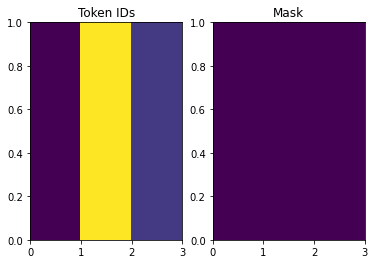

In [ ]:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens.to_tensor())
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens.to_tensor() != 0)
plt.title('Mask')

### Process the dataset



The `process_text` function below converts the `Datasets` of strings, into  0-padded tensors of token IDs. It also converts from a `(context, target)` pair to an `((context, target_in), target_out)` pair for training with `keras.Model.fit`. Keras expects `(inputs, labels)` pairs, the inputs are the `(context, target_in)` and the labels are `target_out`. The difference between `target_in` and `target_out` is that they are shifted by one step relative to eachother, so that at each location the label is the next token.

In [ ]:
def process_text(context, target):
  context = context_text_processor(context).to_tensor()
  target = target_text_processor(target)
  targ_in = target[:,:-1].to_tensor()
  targ_out = target[:,1:].to_tensor()
  return (context, targ_in), targ_out


train_ds = train_raw.map(process_text, tf.data.AUTOTUNE)
val_ds = val_raw.map(process_text, tf.data.AUTOTUNE)

Here is the first sequence of each, from the first batch:

In [ ]:
for (ex_context_tok, ex_tar_in), ex_tar_out in train_ds.take(1):
  print(ex_context_tok[0, :10].numpy()) 
  print()
  print(ex_tar_in[0, :10].numpy()) 
  print(ex_tar_out[0, :10].numpy()) 

[ 2 46  3]

[ 2 44]
[44  3]


## The encoder/decoder

  <th colspan=1>This tutorial's model</th>
<tr>
</table>


Before getting into it define constants for the model:

In [ ]:
UNITS = 256

### The encoder


The encoder:

1. Takes a list of token IDs (from `context_text_processor`).
3. Looks up an embedding vector for each token (Using a `layers.Embedding`).
4. Processes the embeddings into a new sequence (Using a bidirectional `layers.GRU`).
5. Returns the processed sequence. This will be passed to the attention head.

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, text_processor, units):
    super(Encoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.units = units
    
    # The embedding layer converts tokens to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size, units,
                                               mask_zero=True)

    # The RNN layer processes those vectors sequentially.
    self.rnn = tf.keras.layers.Bidirectional(
        merge_mode='sum',
        layer=tf.keras.layers.GRU(units,
                            # Return the sequence and state
                            return_sequences=True,
                            recurrent_initializer='glorot_uniform'))

  def call(self, x):
    shape_checker = ShapeChecker()
    shape_checker(x, 'batch s')

    # 2. The embedding layer looks up the embedding vector for each token.
    x = self.embedding(x)
    shape_checker(x, 'batch s units')

    # 3. The GRU processes the sequence of embeddings.
    x = self.rnn(x)
    shape_checker(x, 'batch s units')

    # 4. Returns the new sequence of embeddings.
    return x

  def convert_input(self, texts):
    texts = tf.convert_to_tensor(texts)
    if len(texts.shape) == 0:
      texts = tf.convert_to_tensor(texts)[tf.newaxis]
    context = self.text_processor(texts).to_tensor()
    context = self(context)
    return context

In [ ]:
# Encode the input sequence.
encoder = Encoder(context_text_processor, UNITS)
ex_context = encoder(ex_context_tok)

print(f'Context tokens, shape (batch, s): {ex_context_tok.shape}')
print(f'Encoder output, shape (batch, s, units): {ex_context.shape}')

Context tokens, shape (batch, s): (1, 3)
Encoder output, shape (batch, s, units): (1, 3, 256)


### The attention layer

The attention layer lets the decoder access the information extracted by the encoder. It computes a vector from the entire context sequence, and adds that to the decoder's output. 


In [ ]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self, units, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(key_dim=units, num_heads=1, **kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

  def call(self, x, context):
    shape_checker = ShapeChecker()
 
    shape_checker(x, 'batch t units')
    shape_checker(context, 'batch s units')

    attn_output, attn_scores = self.mha(
        query=x,
        value=context,
        return_attention_scores=True)
    
    shape_checker(x, 'batch t units')
    shape_checker(attn_scores, 'batch heads t s')
    
    # Cache the attention scores for plotting later.
    attn_scores = tf.reduce_mean(attn_scores, axis=1)
    shape_checker(attn_scores, 'batch t s')
    self.last_attention_weights = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [ ]:
attention_layer = CrossAttention(UNITS)

# Attend to the encoded tokens
embed = tf.keras.layers.Embedding(target_text_processor.vocabulary_size(),
                                  output_dim=UNITS, mask_zero=True)
ex_tar_embed = embed(ex_tar_in)

result = attention_layer(ex_tar_embed, ex_context)

print(f'Context sequence, shape (batch, s, units): {ex_context.shape}')
print(f'Target sequence, shape (batch, t, units): {ex_tar_embed.shape}')
print(f'Attention result, shape (batch, t, units): {result.shape}')
print(f'Attention weights, shape (batch, t, s):    {attention_layer.last_attention_weights.shape}')

Context sequence, shape (batch, s, units): (1, 3, 256)
Target sequence, shape (batch, t, units): (1, 2, 256)
Attention result, shape (batch, t, units): (1, 2, 256)
Attention weights, shape (batch, t, s):    (1, 2, 3)


The attention weights will sum to `1` over the context sequence, at each location in the target sequence.

In [ ]:
attention_layer.last_attention_weights[0].numpy().sum(axis=-1)

array([1., 1.], dtype=float32)



Here are the attention weights across the context sequences at `t=0`:

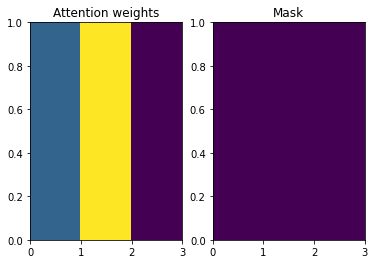

In [ ]:
attention_weights = attention_layer.last_attention_weights
mask=(ex_context_tok != 0).numpy()

plt.subplot(1, 2, 1)
plt.pcolormesh(mask*attention_weights[:, 0, :])
plt.title('Attention weights')

plt.subplot(1, 2, 2)
plt.pcolormesh(mask)
plt.title('Mask');


Because of the small-random initialization the attention weights are initially all close to `1/(sequence_length)`. The model will learn to make these less uniform as training progresses.

### The decoder

The decoder's job is to generate predictions for the next token at each location in the target sequence.

1. It looks up embeddings for each token in the target sequence.
2. It uses an RNN to process the target sequence, and keep track of what it has generated so far.
3. It uses RNN output as the "query" to the attention layer, when attending to the encoder's output.
4. At each location in the output it predicts the next token.


Here is the `Decoder` class' initializer. The initializer creates all the necessary layers.

In [ ]:
class Decoder(tf.keras.layers.Layer):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, text_processor, units):
    super(Decoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.word_to_id = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]')
    self.id_to_word = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]',
        invert=True)
    self.start_token = self.word_to_id('[START]')
    self.end_token = self.word_to_id('[END]')

    self.units = units


    # 1. The embedding layer converts token IDs to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size,
                                               units, mask_zero=True)

    # 2. The RNN keeps track of what's been generated so far.
    self.rnn = tf.keras.layers.GRU(units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    # 3. The RNN output will be the query for the attention layer.
    self.attention = CrossAttention(units)

    # 4. This fully connected layer produces the logits for each
    # output token.
    self.output_layer = tf.keras.layers.Dense(self.vocab_size)

#### Training

Next, the `call` method, takes 3 arguments:

* `inputs` -  a `context, x` pair where:
  * `context` - is the context from the encoder's output.
  * `x` - is the target sequence input.
* `state` - Optional, the previous `state` output from the decoder (the internal state of the decoder's RNN). Pass the state from a previous run to continue generating text where you left off.
* `return_state` - [Default: False] - Set this to `True` to return the RNN state. 

In [ ]:
@Decoder.add_method
def call(self,
         context, x,
         state=None,
         return_state=False):  
  shape_checker = ShapeChecker()
  shape_checker(x, 'batch t')
  shape_checker(context, 'batch s units')

  # 1. Lookup the embeddings
  x = self.embedding(x)
  shape_checker(x, 'batch t units')

  # 2. Process the target sequence.
  x, state = self.rnn(x, initial_state=state)
  shape_checker(x, 'batch t units')

  # 3. Use the RNN output as the query for the attention over the context.
  x = self.attention(x, context)
  self.last_attention_weights = self.attention.last_attention_weights
  shape_checker(x, 'batch t units')
  shape_checker(self.last_attention_weights, 'batch t s')

  # Step 4. Generate logit predictions for the next token.
  logits = self.output_layer(x)
  shape_checker(logits, 'batch t target_vocab_size')

  if return_state:
    return logits, state
  else:
    return logits

That will be sufficient for training. Create an instance of the decoder to test out:

In [ ]:
decoder = Decoder(target_text_processor, UNITS)

Decoder usage

In [ ]:
logits = decoder(ex_context, ex_tar_in)

print(f'encoder output shape: (batch, s, units) {ex_context.shape}')
print(f'input target tokens shape: (batch, t) {ex_tar_in.shape}')
print(f'logits shape shape: (batch, target_vocabulary_size) {logits.shape}')

encoder output shape: (batch, s, units) (1, 3, 256)
input target tokens shape: (batch, t) (1, 2)
logits shape shape: (batch, target_vocabulary_size) (1, 2, 82)


#### Inference

For inference usage couple more methods.

In [ ]:
@Decoder.add_method
def get_initial_state(self, context):
  batch_size = tf.shape(context)[0]
  start_tokens = tf.fill([batch_size, 1], self.start_token)
  done = tf.zeros([batch_size, 1], dtype=tf.bool)
  embedded = self.embedding(start_tokens)
  return start_tokens, done, self.rnn.get_initial_state(embedded)[0]

In [ ]:
@Decoder.add_method
def tokens_to_text(self, tokens):
  words = self.id_to_word(tokens)
  result = tf.strings.reduce_join(words, axis=-1, separator=' ')
  result = tf.strings.regex_replace(result, '^ *\[START\] *', '')
  result = tf.strings.regex_replace(result, ' *\[END\] *$', '')
  return result

In [ ]:
@Decoder.add_method
def get_next_token(self, context, next_token, done, state, temperature = 0.0):
  logits, state = self(
    context, next_token,
    state = state,
    return_state=True) 
  
  if temperature == 0.0:
    next_token = tf.argmax(logits, axis=-1)
  else:
    logits = logits[:, -1, :]/temperature
    next_token = tf.random.categorical(logits, num_samples=1)

  # If a sequence produces an `end_token`, set it `done`
  done = done | (next_token == self.end_token)
  # Once a sequence is done it only produces 0-padding.
  next_token = tf.where(done, tf.constant(0, dtype=tf.int64), next_token)
  
  return next_token, done, state

With those extra functions, you can write a generation loop:

In [ ]:
# Setup the loop variables.
next_token, done, state = decoder.get_initial_state(ex_context)
tokens = []

for n in range(10):
  # Run one step.
  next_token, done, state = decoder.get_next_token(
      ex_context, next_token, done, state, temperature=1.0)
  # Add the token to the output.
  tokens.append(next_token)

# Stack all the tokens together.
tokens = tf.concat(tokens, axis=-1) # (batch, t)

# Convert the tokens back to a a string
result = decoder.tokens_to_text(tokens)
result[:3].numpy()

array([b'moduleom_nameopendeclarationonesigclass1_nameextendsclassattrset=c1_at1+c1_at2id=c1_at1noparentisabstract=no}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassattrset=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisabstract=no}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsclassattrset=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisabstract=no}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsclassattrset=c4_at1id=c4_at1noparentisabstract=no}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsclassattrset=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisabstract=no}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsclassattrset=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1



```
# This is formatted as code
```

**Since the model's untrained, it outputs items from the vocabulary almost uniformly at random. **

## The model


In [ ]:
class Translator(tf.keras.Model):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, units,
               context_text_processor,
               target_text_processor):
    super().__init__()
    # Build the encoder and decoder
    encoder = Encoder(context_text_processor, units)
    decoder = Decoder(target_text_processor, units)

    self.encoder = encoder
    self.decoder = decoder

  def call(self, inputs):
    context, x = inputs
    context = self.encoder(context)
    logits = self.decoder(context, x)

    #TODO(b/250038731): remove this
    try:
      # Delete the keras mask, so keras doesn't scale the loss+accuracy. 
      del logits._keras_mask
    except AttributeError:
      pass

    return logits

During training the model will be used like this:

In [ ]:
model = Translator(UNITS, context_text_processor, target_text_processor)

logits = model((ex_context_tok, ex_tar_in))

print(f'Context tokens, shape: (batch, s, units) {ex_context_tok.shape}')
print(f'Target tokens, shape: (batch, t) {ex_tar_in.shape}')
print(f'logits, shape: (batch, t, target_vocabulary_size) {logits.shape}')

Context tokens, shape: (batch, s, units) (1, 3)
Target tokens, shape: (batch, t) (1, 2)
logits, shape: (batch, t, target_vocabulary_size) (1, 2, 82)


### Train

For training, you'll want to implement your own masked loss and accuracy functions:

In [ ]:
def masked_loss(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    loss = loss_fn(y_true, y_pred)

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, loss.dtype)
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)/tf.reduce_sum(mask)

In [ ]:
def masked_acc(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    y_pred = tf.argmax(y_pred, axis=-1)
    y_pred = tf.cast(y_pred, y_true.dtype)
    
    match = tf.cast(y_true == y_pred, tf.float32)
    mask = tf.cast(y_true != 0, tf.float32)
    
    return tf.reduce_sum(match)/tf.reduce_sum(mask)

Configure the model for training:

In [ ]:
model.compile(optimizer='adam',
              loss=masked_loss, 
              metrics=[masked_acc, masked_loss])

The model is randomly initialized, and should give roughly uniform output probabilities. So it's easy to predict what the initial values of the metrics should be:

In [ ]:
vocab_size = 1.0 * target_text_processor.vocabulary_size()

{"expected_loss": tf.math.log(vocab_size).numpy(),
 "expected_acc": 1/vocab_size}

{'expected_loss': 4.406719, 'expected_acc': 0.012195121951219513}

That should roughly match the values returned by running a few steps of evaluation:

In [ ]:
model.evaluate(val_ds, steps=30, return_dict=True)

28/30 [===========================>..] - ETA: 0s - loss: 3.8963 - masked_acc: 0.5893 - masked_loss: 3.8963

30/30 [==============================] - 2s 50ms/step - loss: 3.8963 - masked_acc: 0.5893 - masked_loss: 3.8963


{'loss': 3.8963074684143066,
 'masked_acc': 0.5892857313156128,
 'masked_loss': 3.8963074684143066}

In [ ]:
history = model.fit(
    train_ds.repeat(), 
    epochs=100,
    steps_per_epoch = 100,
    validation_data=val_ds,
    validation_steps = 30,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/100
 99/100 [============================>.] - ETA: 0s - loss: 0.2742 - masked_acc: 0.9343 - masked_loss: 0.2742

100/100 [==============================] - 5s 51ms/step - loss: 0.2718 - masked_acc: 0.9350 - masked_loss: 0.2718 - val_loss: 3.3537 - val_masked_acc: 0.5893 - val_masked_loss: 3.3537
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 0.0790 - masked_acc: 0.9800 - masked_loss: 0.0790

100/100 [==============================] - 5s 46ms/step - loss: 0.0790 - masked_acc: 0.9800 - masked_loss: 0.0790
Epoch 3/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0518 - masked_acc: 0.9899 - masked_loss: 0.0518

100/100 [==============================] - 3s 26ms/step - loss: 0.0514 - masked_acc: 0.9900 - masked_loss: 0.0514
Epoch 4/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0222 - masked_acc: 0.9949 - masked_loss: 0.0222

100/100 [==============================] - 2s 22ms/step - loss: 0.0219 - masked_acc: 0.9950 - masked_loss: 0.0219
Epoch 5/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0231 - masked_acc: 0.9949 - masked_loss: 0.0231

100/100 [==============================] - 2s 22ms/step - loss: 0.0229 - masked_acc: 0.9950 - masked_loss: 0.0229
Epoch 6/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0402 - masked_acc: 0.9898 - masked_loss: 0.0402

100/100 [==============================] - 2s 22ms/step - loss: 0.0395 - masked_acc: 0.9900 - masked_loss: 0.0395
Epoch 7/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0039 - masked_acc: 1.0000 - masked_loss: 0.0039

100/100 [==============================] - 2s 22ms/step - loss: 0.0039 - masked_acc: 1.0000 - masked_loss: 0.0039
Epoch 8/100
100/100 [==============================] - ETA: 0s - loss: 0.0387 - masked_acc: 0.9900 - masked_loss: 0.0387

100/100 [==============================] - 2s 21ms/step - loss: 0.0387 - masked_acc: 0.9900 - masked_loss: 0.0387
Epoch 9/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0325 - masked_acc: 0.9899 - masked_loss: 0.0325

100/100 [==============================] - 2s 21ms/step - loss: 0.0322 - masked_acc: 0.9900 - masked_loss: 0.0322
Epoch 10/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0185 - masked_acc: 0.9898 - masked_loss: 0.0185

100/100 [==============================] - 2s 21ms/step - loss: 0.0182 - masked_acc: 0.9900 - masked_loss: 0.0182
Epoch 11/100
100/100 [==============================] - ETA: 0s - loss: 0.0165 - masked_acc: 0.9950 - masked_loss: 0.0165

100/100 [==============================] - 2s 21ms/step - loss: 0.0165 - masked_acc: 0.9950 - masked_loss: 0.0165
Epoch 12/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0183 - masked_acc: 0.9949 - masked_loss: 0.0183

100/100 [==============================] - 4s 36ms/step - loss: 0.0181 - masked_acc: 0.9950 - masked_loss: 0.0181
Epoch 13/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0428 - masked_acc: 0.9847 - masked_loss: 0.0428

100/100 [==============================] - 3s 31ms/step - loss: 0.0419 - masked_acc: 0.9850 - masked_loss: 0.0419
Epoch 14/100
100/100 [==============================] - ETA: 0s - loss: 0.0017 - masked_acc: 1.0000 - masked_loss: 0.0017

100/100 [==============================] - 2s 22ms/step - loss: 0.0017 - masked_acc: 1.0000 - masked_loss: 0.0017
Epoch 15/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0352 - masked_acc: 0.9848 - masked_loss: 0.0352

100/100 [==============================] - 2s 23ms/step - loss: 0.0348 - masked_acc: 0.9850 - masked_loss: 0.0348
Epoch 16/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0153 - masked_acc: 0.9949 - masked_loss: 0.0153

100/100 [==============================] - 2s 22ms/step - loss: 0.0151 - masked_acc: 0.9950 - masked_loss: 0.0151
Epoch 17/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0129 - masked_acc: 0.9949 - masked_loss: 0.0129

100/100 [==============================] - 2s 21ms/step - loss: 0.0127 - masked_acc: 0.9950 - masked_loss: 0.0127
Epoch 18/100
100/100 [==============================] - ETA: 0s - loss: 0.0129 - masked_acc: 0.9950 - masked_loss: 0.0129

100/100 [==============================] - 2s 22ms/step - loss: 0.0129 - masked_acc: 0.9950 - masked_loss: 0.0129
Epoch 19/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0222 - masked_acc: 0.9899 - masked_loss: 0.0222

100/100 [==============================] - 2s 21ms/step - loss: 0.0220 - masked_acc: 0.9900 - masked_loss: 0.0220
Epoch 20/100
100/100 [==============================] - ETA: 0s - loss: 0.0199 - masked_acc: 0.9900 - masked_loss: 0.0199

100/100 [==============================] - 2s 21ms/step - loss: 0.0199 - masked_acc: 0.9900 - masked_loss: 0.0199
Epoch 21/100
100/100 [==============================] - ETA: 0s - loss: 0.0179 - masked_acc: 0.9900 - masked_loss: 0.0179

100/100 [==============================] - 2s 21ms/step - loss: 0.0179 - masked_acc: 0.9900 - masked_loss: 0.0179
Epoch 22/100
100/100 [==============================] - ETA: 0s - loss: 0.0208 - masked_acc: 0.9900 - masked_loss: 0.0208

100/100 [==============================] - 2s 23ms/step - loss: 0.0208 - masked_acc: 0.9900 - masked_loss: 0.0208
Epoch 23/100
100/100 [==============================] - ETA: 0s - loss: 0.0123 - masked_acc: 0.9950 - masked_loss: 0.0123

100/100 [==============================] - 2s 22ms/step - loss: 0.0123 - masked_acc: 0.9950 - masked_loss: 0.0123
Epoch 24/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0171 - masked_acc: 0.9949 - masked_loss: 0.0171

100/100 [==============================] - 2s 22ms/step - loss: 0.0168 - masked_acc: 0.9950 - masked_loss: 0.0168
Epoch 25/100
100/100 [==============================] - ETA: 0s - loss: 0.0061 - masked_acc: 0.9950 - masked_loss: 0.0061

100/100 [==============================] - 2s 22ms/step - loss: 0.0061 - masked_acc: 0.9950 - masked_loss: 0.0061
Epoch 26/100
100/100 [==============================] - ETA: 0s - loss: 0.0292 - masked_acc: 0.9900 - masked_loss: 0.0292

100/100 [==============================] - 2s 22ms/step - loss: 0.0292 - masked_acc: 0.9900 - masked_loss: 0.0292
Epoch 27/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0179 - masked_acc: 0.9899 - masked_loss: 0.0179

100/100 [==============================] - 2s 22ms/step - loss: 0.0178 - masked_acc: 0.9900 - masked_loss: 0.0178
Epoch 28/100
100/100 [==============================] - ETA: 0s - loss: 0.0139 - masked_acc: 0.9950 - masked_loss: 0.0139

100/100 [==============================] - 4s 35ms/step - loss: 0.0139 - masked_acc: 0.9950 - masked_loss: 0.0139
Epoch 29/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0150 - masked_acc: 0.9949 - masked_loss: 0.0150

100/100 [==============================] - 3s 33ms/step - loss: 0.0147 - masked_acc: 0.9950 - masked_loss: 0.0147
Epoch 30/100
100/100 [==============================] - ETA: 0s - loss: 0.0094 - masked_acc: 0.9950 - masked_loss: 0.0094

100/100 [==============================] - 2s 24ms/step - loss: 0.0094 - masked_acc: 0.9950 - masked_loss: 0.0094
Epoch 31/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0135 - masked_acc: 0.9949 - masked_loss: 0.0135

100/100 [==============================] - 2s 23ms/step - loss: 0.0132 - masked_acc: 0.9950 - masked_loss: 0.0132
Epoch 32/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0143 - masked_acc: 0.9949 - masked_loss: 0.0143

100/100 [==============================] - 2s 22ms/step - loss: 0.0142 - masked_acc: 0.9950 - masked_loss: 0.0142
Epoch 33/100
100/100 [==============================] - ETA: 0s - loss: 0.0230 - masked_acc: 0.9850 - masked_loss: 0.0230

100/100 [==============================] - 2s 22ms/step - loss: 0.0230 - masked_acc: 0.9850 - masked_loss: 0.0230
Epoch 34/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0122 - masked_acc: 0.9949 - masked_loss: 0.0122

100/100 [==============================] - 2s 21ms/step - loss: 0.0120 - masked_acc: 0.9950 - masked_loss: 0.0120
Epoch 35/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0025 - masked_acc: 1.0000 - masked_loss: 0.0025

100/100 [==============================] - 2s 22ms/step - loss: 0.0120 - masked_acc: 0.9950 - masked_loss: 0.0120
Epoch 36/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0119 - masked_acc: 0.9949 - masked_loss: 0.0119

100/100 [==============================] - 2s 21ms/step - loss: 0.0118 - masked_acc: 0.9950 - masked_loss: 0.0118
Epoch 37/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0189 - masked_acc: 0.9847 - masked_loss: 0.0189

100/100 [==============================] - 2s 22ms/step - loss: 0.0185 - masked_acc: 0.9850 - masked_loss: 0.0185
Epoch 38/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0061 - masked_acc: 0.9949 - masked_loss: 0.0061

100/100 [==============================] - 2s 22ms/step - loss: 0.0079 - masked_acc: 0.9950 - masked_loss: 0.0079
Epoch 39/100
100/100 [==============================] - ETA: 0s - loss: 0.0096 - masked_acc: 0.9950 - masked_loss: 0.0096

100/100 [==============================] - 2s 22ms/step - loss: 0.0096 - masked_acc: 0.9950 - masked_loss: 0.0096
Epoch 40/100
100/100 [==============================] - ETA: 0s - loss: 0.0126 - masked_acc: 0.9900 - masked_loss: 0.0126

100/100 [==============================] - 3s 26ms/step - loss: 0.0126 - masked_acc: 0.9900 - masked_loss: 0.0126
Epoch 41/100
100/100 [==============================] - ETA: 0s - loss: 0.0088 - masked_acc: 0.9950 - masked_loss: 0.0088

100/100 [==============================] - 4s 40ms/step - loss: 0.0088 - masked_acc: 0.9950 - masked_loss: 0.0088
Epoch 42/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0244 - masked_acc: 0.9796 - masked_loss: 0.0244

100/100 [==============================] - 2s 22ms/step - loss: 0.0239 - masked_acc: 0.9800 - masked_loss: 0.0239
Epoch 43/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0064 - masked_acc: 0.9949 - masked_loss: 0.0064

100/100 [==============================] - 4s 38ms/step - loss: 0.0063 - masked_acc: 0.9950 - masked_loss: 0.0063
Epoch 44/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0105 - masked_acc: 0.9949 - masked_loss: 0.0105

100/100 [==============================] - 3s 27ms/step - loss: 0.0104 - masked_acc: 0.9950 - masked_loss: 0.0104
Epoch 45/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0225 - masked_acc: 0.9848 - masked_loss: 0.0225

100/100 [==============================] - 2s 22ms/step - loss: 0.0223 - masked_acc: 0.9850 - masked_loss: 0.0223
Epoch 46/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0150 - masked_acc: 0.9949 - masked_loss: 0.0150

100/100 [==============================] - 2s 22ms/step - loss: 0.0147 - masked_acc: 0.9950 - masked_loss: 0.0147
Epoch 47/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0084 - masked_acc: 0.9949 - masked_loss: 0.0084

100/100 [==============================] - 2s 22ms/step - loss: 0.0082 - masked_acc: 0.9950 - masked_loss: 0.0082
Epoch 48/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0120 - masked_acc: 0.9949 - masked_loss: 0.0120

100/100 [==============================] - 2s 21ms/step - loss: 0.0118 - masked_acc: 0.9950 - masked_loss: 0.0118
Epoch 49/100
100/100 [==============================] - ETA: 0s - loss: 0.0107 - masked_acc: 0.9950 - masked_loss: 0.0107

100/100 [==============================] - 2s 22ms/step - loss: 0.0107 - masked_acc: 0.9950 - masked_loss: 0.0107
Epoch 50/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0129 - masked_acc: 0.9899 - masked_loss: 0.0129

100/100 [==============================] - 2s 21ms/step - loss: 0.0128 - masked_acc: 0.9900 - masked_loss: 0.0128
Epoch 51/100
100/100 [==============================] - ETA: 0s - loss: 0.0159 - masked_acc: 0.9850 - masked_loss: 0.0159

100/100 [==============================] - 2s 22ms/step - loss: 0.0159 - masked_acc: 0.9850 - masked_loss: 0.0159
Epoch 52/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0027 - masked_acc: 1.0000 - masked_loss: 0.0027

100/100 [==============================] - 2s 21ms/step - loss: 0.0027 - masked_acc: 1.0000 - masked_loss: 0.0027
Epoch 53/100
100/100 [==============================] - ETA: 0s - loss: 0.0178 - masked_acc: 0.9900 - masked_loss: 0.0178

100/100 [==============================] - 2s 22ms/step - loss: 0.0178 - masked_acc: 0.9900 - masked_loss: 0.0178
Epoch 54/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0080 - masked_acc: 0.9949 - masked_loss: 0.0080

100/100 [==============================] - 2s 22ms/step - loss: 0.0080 - masked_acc: 0.9950 - masked_loss: 0.0080
Epoch 55/100
100/100 [==============================] - ETA: 0s - loss: 0.0091 - masked_acc: 0.9950 - masked_loss: 0.0091

100/100 [==============================] - 2s 22ms/step - loss: 0.0091 - masked_acc: 0.9950 - masked_loss: 0.0091
Epoch 56/100
100/100 [==============================] - ETA: 0s - loss: 0.0185 - masked_acc: 0.9850 - masked_loss: 0.0185

100/100 [==============================] - 2s 22ms/step - loss: 0.0185 - masked_acc: 0.9850 - masked_loss: 0.0185
Epoch 57/100
100/100 [==============================] - ETA: 0s - loss: 1.4631e-04 - masked_acc: 1.0000 - masked_loss: 1.4631e-04

100/100 [==============================] - 2s 22ms/step - loss: 1.4631e-04 - masked_acc: 1.0000 - masked_loss: 1.4631e-04
Epoch 58/100
100/100 [==============================] - ETA: 0s - loss: 0.0184 - masked_acc: 0.9900 - masked_loss: 0.0184

100/100 [==============================] - 2s 21ms/step - loss: 0.0184 - masked_acc: 0.9900 - masked_loss: 0.0184
Epoch 59/100
100/100 [==============================] - ETA: 0s - loss: 0.0040 - masked_acc: 0.9950 - masked_loss: 0.0040

100/100 [==============================] - 3s 33ms/step - loss: 0.0040 - masked_acc: 0.9950 - masked_loss: 0.0040
Epoch 60/100
100/100 [==============================] - ETA: 0s - loss: 0.0064 - masked_acc: 0.9950 - masked_loss: 0.0064

100/100 [==============================] - 3s 33ms/step - loss: 0.0064 - masked_acc: 0.9950 - masked_loss: 0.0064
Epoch 61/100
100/100 [==============================] - ETA: 0s - loss: 0.0112 - masked_acc: 0.9900 - masked_loss: 0.0112

100/100 [==============================] - 2s 21ms/step - loss: 0.0112 - masked_acc: 0.9900 - masked_loss: 0.0112
Epoch 62/100
100/100 [==============================] - ETA: 0s - loss: 0.0188 - masked_acc: 0.9900 - masked_loss: 0.0188

100/100 [==============================] - 2s 22ms/step - loss: 0.0188 - masked_acc: 0.9900 - masked_loss: 0.0188
Epoch 63/100
100/100 [==============================] - ETA: 0s - loss: 0.0130 - masked_acc: 0.9900 - masked_loss: 0.0130

100/100 [==============================] - 2s 21ms/step - loss: 0.0130 - masked_acc: 0.9900 - masked_loss: 0.0130
Epoch 64/100
100/100 [==============================] - ETA: 0s - loss: 0.0130 - masked_acc: 0.9900 - masked_loss: 0.0130

100/100 [==============================] - 2s 21ms/step - loss: 0.0130 - masked_acc: 0.9900 - masked_loss: 0.0130
Epoch 65/100
 98/100 [============================>.] - ETA: 0s - loss: 0.9375 - masked_acc: 0.8418 - masked_loss: 0.9375

100/100 [==============================] - 2s 21ms/step - loss: 0.9824 - masked_acc: 0.8350 - masked_loss: 0.9824
Epoch 66/100
 98/100 [============================>.] - ETA: 0s - loss: 2.5185 - masked_acc: 0.5408 - masked_loss: 2.5185

100/100 [==============================] - 2s 21ms/step - loss: 2.4991 - masked_acc: 0.5450 - masked_loss: 2.4991
Epoch 67/100
 98/100 [============================>.] - ETA: 0s - loss: 1.4442 - masked_acc: 0.6582 - masked_loss: 1.4442

100/100 [==============================] - 2s 23ms/step - loss: 1.4189 - masked_acc: 0.6650 - masked_loss: 1.4189
Epoch 68/100
100/100 [==============================] - ETA: 0s - loss: 0.7388 - masked_acc: 0.7900 - masked_loss: 0.7388

100/100 [==============================] - 2s 21ms/step - loss: 0.7388 - masked_acc: 0.7900 - masked_loss: 0.7388
Epoch 69/100
 98/100 [============================>.] - ETA: 0s - loss: 0.1916 - masked_acc: 0.9388 - masked_loss: 0.1916

100/100 [==============================] - 2s 23ms/step - loss: 0.2200 - masked_acc: 0.9350 - masked_loss: 0.2200
Epoch 70/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0777 - masked_acc: 0.9798 - masked_loss: 0.0777

100/100 [==============================] - 2s 22ms/step - loss: 0.0770 - masked_acc: 0.9800 - masked_loss: 0.0770
Epoch 71/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0200 - masked_acc: 0.9949 - masked_loss: 0.0200

100/100 [==============================] - 2s 22ms/step - loss: 0.0196 - masked_acc: 0.9950 - masked_loss: 0.0196
Epoch 72/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0250 - masked_acc: 0.9848 - masked_loss: 0.0250

100/100 [==============================] - 2s 23ms/step - loss: 0.0248 - masked_acc: 0.9850 - masked_loss: 0.0248
Epoch 73/100
100/100 [==============================] - ETA: 0s - loss: 0.0164 - masked_acc: 0.9900 - masked_loss: 0.0164

100/100 [==============================] - 2s 22ms/step - loss: 0.0164 - masked_acc: 0.9900 - masked_loss: 0.0164
Epoch 74/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0124 - masked_acc: 0.9949 - masked_loss: 0.0124

100/100 [==============================] - 2s 22ms/step - loss: 0.0122 - masked_acc: 0.9950 - masked_loss: 0.0122
Epoch 75/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0115 - masked_acc: 0.9949 - masked_loss: 0.0115

100/100 [==============================] - 3s 35ms/step - loss: 0.0114 - masked_acc: 0.9950 - masked_loss: 0.0114
Epoch 76/100
100/100 [==============================] - ETA: 0s - loss: 0.0188 - masked_acc: 0.9850 - masked_loss: 0.0188

100/100 [==============================] - 3s 31ms/step - loss: 0.0188 - masked_acc: 0.9850 - masked_loss: 0.0188
Epoch 77/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0176 - masked_acc: 0.9898 - masked_loss: 0.0176

100/100 [==============================] - 2s 22ms/step - loss: 0.0173 - masked_acc: 0.9900 - masked_loss: 0.0173
Epoch 78/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0053 - masked_acc: 1.0000 - masked_loss: 0.0053

100/100 [==============================] - 2s 23ms/step - loss: 0.0053 - masked_acc: 1.0000 - masked_loss: 0.0053
Epoch 79/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0146 - masked_acc: 0.9898 - masked_loss: 0.0146

100/100 [==============================] - 2s 22ms/step - loss: 0.0143 - masked_acc: 0.9900 - masked_loss: 0.0143
Epoch 80/100
100/100 [==============================] - ETA: 0s - loss: 0.0174 - masked_acc: 0.9850 - masked_loss: 0.0174

100/100 [==============================] - 2s 23ms/step - loss: 0.0174 - masked_acc: 0.9850 - masked_loss: 0.0174
Epoch 81/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0122 - masked_acc: 0.9899 - masked_loss: 0.0122

100/100 [==============================] - 2s 23ms/step - loss: 0.0121 - masked_acc: 0.9900 - masked_loss: 0.0121
Epoch 82/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0117 - masked_acc: 0.9899 - masked_loss: 0.0117

100/100 [==============================] - 2s 22ms/step - loss: 0.0116 - masked_acc: 0.9900 - masked_loss: 0.0116
Epoch 83/100
100/100 [==============================] - ETA: 0s - loss: 0.0106 - masked_acc: 0.9950 - masked_loss: 0.0106

100/100 [==============================] - 2s 23ms/step - loss: 0.0106 - masked_acc: 0.9950 - masked_loss: 0.0106
Epoch 84/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0125 - masked_acc: 0.9899 - masked_loss: 0.0125

100/100 [==============================] - 2s 23ms/step - loss: 0.0123 - masked_acc: 0.9900 - masked_loss: 0.0123
Epoch 85/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0130 - masked_acc: 0.9898 - masked_loss: 0.0130

100/100 [==============================] - 2s 23ms/step - loss: 0.0128 - masked_acc: 0.9900 - masked_loss: 0.0128
Epoch 86/100
100/100 [==============================] - ETA: 0s - loss: 0.0113 - masked_acc: 0.9900 - masked_loss: 0.0113

100/100 [==============================] - 2s 23ms/step - loss: 0.0113 - masked_acc: 0.9900 - masked_loss: 0.0113
Epoch 87/100
100/100 [==============================] - ETA: 0s - loss: 0.0082 - masked_acc: 0.9950 - masked_loss: 0.0082

100/100 [==============================] - 2s 23ms/step - loss: 0.0082 - masked_acc: 0.9950 - masked_loss: 0.0082
Epoch 88/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0116 - masked_acc: 0.9949 - masked_loss: 0.0116

100/100 [==============================] - 2s 23ms/step - loss: 0.0115 - masked_acc: 0.9950 - masked_loss: 0.0115
Epoch 89/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0162 - masked_acc: 0.9898 - masked_loss: 0.0162

100/100 [==============================] - 2s 22ms/step - loss: 0.0159 - masked_acc: 0.9900 - masked_loss: 0.0159
Epoch 90/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0106 - masked_acc: 0.9899 - masked_loss: 0.0106

100/100 [==============================] - 3s 33ms/step - loss: 0.0105 - masked_acc: 0.9900 - masked_loss: 0.0105
Epoch 91/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0139 - masked_acc: 0.9949 - masked_loss: 0.0139

100/100 [==============================] - 4s 36ms/step - loss: 0.0137 - masked_acc: 0.9950 - masked_loss: 0.0137
Epoch 92/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0057 - masked_acc: 0.9949 - masked_loss: 0.0057

100/100 [==============================] - 2s 24ms/step - loss: 0.0056 - masked_acc: 0.9950 - masked_loss: 0.0056
Epoch 93/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0112 - masked_acc: 0.9949 - masked_loss: 0.0112

100/100 [==============================] - 2s 23ms/step - loss: 0.0111 - masked_acc: 0.9950 - masked_loss: 0.0111
Epoch 94/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0199 - masked_acc: 0.9898 - masked_loss: 0.0199

100/100 [==============================] - 2s 23ms/step - loss: 0.0196 - masked_acc: 0.9900 - masked_loss: 0.0196
Epoch 95/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0094 - masked_acc: 0.9898 - masked_loss: 0.0094

100/100 [==============================] - 2s 23ms/step - loss: 0.0093 - masked_acc: 0.9900 - masked_loss: 0.0093
Epoch 96/100
100/100 [==============================] - ETA: 0s - loss: 0.0036 - masked_acc: 1.0000 - masked_loss: 0.0036        

100/100 [==============================] - 2s 23ms/step - loss: 0.0036 - masked_acc: 1.0000 - masked_loss: 0.0036
Epoch 97/100
100/100 [==============================] - ETA: 0s - loss: 0.0105 - masked_acc: 0.9950 - masked_loss: 0.0105

100/100 [==============================] - 2s 21ms/step - loss: 0.0105 - masked_acc: 0.9950 - masked_loss: 0.0105
Epoch 98/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0167 - masked_acc: 0.9848 - masked_loss: 0.0167

100/100 [==============================] - 2s 21ms/step - loss: 0.0166 - masked_acc: 0.9850 - masked_loss: 0.0166
Epoch 99/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0104 - masked_acc: 0.9898 - masked_loss: 0.0104

100/100 [==============================] - 2s 22ms/step - loss: 0.0102 - masked_acc: 0.9900 - masked_loss: 0.0102
Epoch 100/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0101 - masked_acc: 0.9898 - masked_loss: 0.0101

100/100 [==============================] - 2s 22ms/step - loss: 0.0100 - masked_acc: 0.9900 - masked_loss: 0.0100


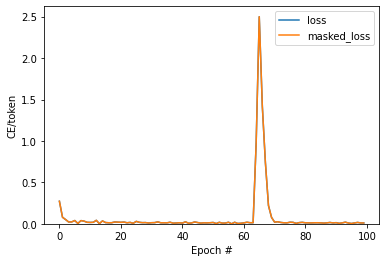

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['masked_loss'], label='masked_loss')
#plt.plot(history.history['val_masked_loss'], label='val_masked_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

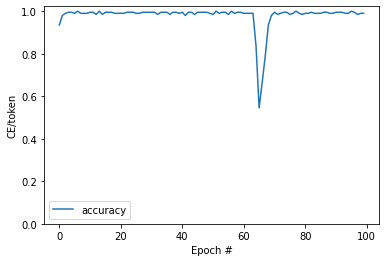

In [ ]:
plt.plot(history.history['masked_acc'], label='accuracy')
#plt.plot(history.history['val_masked_acc'], label='val_accuracy')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

### Translate

Now that the model is trained, implement a function to execute the full `text => text` translation. This code is basically identical to the [inference example](#inference) in the [decoder section](#the_decoder), but this also captures the attention weights.

In [ ]:
#@title
@Translator.add_method
def translate(self,
              texts, *,
              max_length=50,
              temperature=0.0):
  # Process the input texts
  context = self.encoder.convert_input(texts)
  batch_size = tf.shape(texts)[0]

  # Setup the loop inputs
  tokens = []
  attention_weights = []
  next_token, done, state = self.decoder.get_initial_state(context)

  for _ in range(max_length):
    # Generate the next token
    next_token, done, state = self.decoder.get_next_token(
        context, next_token, done,  state, temperature)
        
    # Collect the generated tokens
    tokens.append(next_token)
    attention_weights.append(self.decoder.last_attention_weights)
    
    if tf.executing_eagerly() and tf.reduce_all(done):
      break

  # Stack the lists of tokens and attention weights.
  tokens = tf.concat(tokens, axis=-1)   # t*[(batch 1)] -> (batch, t)
  self.last_attention_weights = tf.concat(attention_weights, axis=1)  # t*[(batch 1 s)] -> (batch, t s)

  result = self.decoder.tokens_to_text(tokens)
  return result

Here are the two helper methods, used above, to convert tokens to text, and to get the next token:

In [ ]:

#With Spaces 

#Customer Order Unseen 
#NP 
result00 = model.translate(['module OM_name one sig class1_name extends Class attrSet = c1_at1+c1_at2 attrSet = c1_at1+c1_at2 isAbstract = No no parent one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class id=Integer isAbstract = No no parent one sig c2_at1 extends c2_at1_type one sig c2_at1 extends c2_at1_type one sig assoc1 extends Association src = class1_name dst = class2_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc one sig class3_name extends Class attrSet = c3_at1 one parent parent in class1_name isAbstract = No attrSet = c1_at1+c1_at2 one sig c3_at1 extends c3_at1_type pred show run show for 16,OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at2: c1_at2_type Table: class3_name Attribute c3_at1: c3_at1_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class3_name Attribute c1_at1: c1_at1_type Foreign Key Table: class3_name Parent Class class1_name Table Name: class1_name Table Name: class2_name Table Name: class3_name Association Table assoc1 Source : class1_name Association Table assoc1 Destination : class2_name One To Many Association Source > Destination Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class1_name: map_str1 Mapping Strategy of Table class3_name: map_str1 Association Mapping Strategy: Own Association Table, USE OM_name_0 Table structure for table class2_name CREATE TABLE `class2_name` ( `c2_at2` c2_at2_type `c2_at1` c2_at1_type NOT NULL PRIMARY KEY (`c2_at1`) Table structure for table class1_name CREATE TABLE `class1_name` `c1_at3` c1_at3_type(64) `c1_at2` c1_at2_type `c3_at1` int `c1_at1` c1_at1_type NOT NULL PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `assoc1` `c2_at1` c2_at1_type NOT NULL `c1_at1` c1_at1_type NOT NULL KEY `FK_assoc1_c2_at1_idx` (`c2_at1`) KEY `FK_assoc1_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c2_at1`,`c1_at1`) ALTER TABLE `assoc1` ADD CONSTRAINT `FK_assoc1_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc1_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE'])
result001 = model.translate(['odule OM_name one sig class1_name extends Class attrSet = c1_at1+c1_at2 attrSet = c1_at1+c1_at2 isAbstract = No no parent one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class id=Integer isAbstract = No no parent one sig c2_at1 extends c2_at1_type one sig c2_at1 extends c2_at1_type one sig assoc1 extends Association src = class1_name dst = class2_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc one sig class3_name extends Class attrSet = c3_at1 one parent parent in class1_name isAbstract = No attrSet = c1_at1+c1_at2 one sig c3_at1 extends c3_at1_type pred show run show for 16,OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at2: c1_at2_type Table: class3_name Attribute c3_at1: c3_at1_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class3_name Attribute c1_at1: c1_at1_type Foreign Key Table: class3_name Parent Class class1_name Table Name: class1_name Table Name: class2_name Table Name: class3_name Association Table assoc1 Source : class1_name Association Table assoc1 Destination : class2_name One To Many Association Source > Destination Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class1_name: map_str1 Mapping Strategy of Table class3_name: map_str1 Association Mapping Strategy: Own Association Table, USE OM_name_0 Table structure for table class2_name CREATE TABLE `class2_name` ( `c2_at2` c2_at2_type `c2_at1` c2_at1_type NOT NULL PRIMARY KEY (`c2_at1`) Table structure for table class1_name CREATE TABLE `class1_name` `c1_at3` c1_at3_type(64) `c1_at2` c1_at2_type `c3_at1` int `c1_at1` c1_at1_type NOT NULL PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `assoc1` `c2_at1` c2_at1_type NOT NULL `c1_at1` c1_at1_type NOT NULL KEY `FK_assoc1_c2_at1_idx` (`c2_at1`) KEY `FK_assoc1_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c2_at1`,`c1_at1`) ALTER TABLE `assoc1` ADD CONSTRAINT `FK_assoc1_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc1_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE '])
#P
result002 = model.translate(['module OM_name one sig class1_name extends Class attrSet = c1_at1+c1_at2 attrSet = c1_at1+c1_at2 isAbstract = No no parent one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class id=Integer isAbstract = No no parent one sig c2_at1 extends c2_at1_type one sig c2_at1 extends c2_at1_type one sig assoc1 extends Association src = class1_name dst = class2_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc one sig class3_name extends Class attrSet = c3_at1 one parent parent in class1_name isAbstract = No attrSet = c1_at1+c1_at2 one sig c3_at1 extends c3_at1_type pred show run show for 16, OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at2: c1_at2_type Table: class3_name Attribute c3_at1: c3_at1_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class3_name Attribute c1_at1: c1_at1_type Foreign Key Table: class3_name Parent Class class1_name Table Name: class1_name Table Name: class2_name Table Name: class3_name Association Table assoc1 Source : class1_name Association Table assoc1 Destination : class2_name One To Many Association Source > Destination Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class1_name: map_str1 Mapping Strategy of Table class3_name: map_str1 Association Mapping Strategy: Own Association Table, USE OM_name_0 Table structure for table class2_name CREATE TABLE `class2_name` ( `c2_at2` c2_at2_type `c2_at1` c2_at1_type NOT NULL PRIMARY KEY (`orderID`) Table structure for table class3_name CREATE TABLE `class3_name` `c3_at1` int `c1_at1` c1_at1_type NOT NULL KEY `FK_class3_name_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `class1_name` `c1_at2` c1_at2_type `c1_at1` c1_at1_type NOT NULL PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `assoc1` `c2_at1` c2_at1_type NOT NULL `c1_at1` c1_at1_type NOT NULL KEY `FK_assoc1_c2_at1_idx` (`c2_at1`) KEY `FK_assoc1_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c2_at1`,`c1_at1`) ALTER TABLE `class3_name` ADD CONSTRAINT `FK_class3_name_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `assoc1` ADD CONSTRAINT `FK_assoc1_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc1_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE'])
result004 = model.translate(['module OM_name one sig class1_name extends Class attrSet = c1_at1+c1_at2 attrSet = c1_at1+c1_at2 isAbstract = No no parent one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class id=Integer isAbstract = No no parent one sig c2_at1 extends c2_at1_type one sig c2_at1 extends c2_at1_type one sig assoc1 extends Association src = class1_name dst = class2_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc one sig class3_name extends Class attrSet = c3_at1 one parent parent in class1_name isAbstract = No attrSet = c1_at1+c1_at2 one sig c3_at1 extends c3_at1_type pred show run show for 16, OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at2: c1_at2_type Table: class3_name Attribute c3_at1: c3_at1_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class3_name Attribute c1_at1: c1_at1_type Foreign Key Table: class3_name Parent Class class1_name Table Name: class1_name Table Name: class2_name Table Name: class3_name Association Table assoc1 Source : class1_name Association Table assoc1 Destination : class2_name One To Many Association Source > Destination Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class1_name: map_str1 Mapping Strategy of Table class3_name: map_str1 Association Mapping Strategy: Own Association Table, USE OM_name_0 Table structure for table class2_name CREATE TABLE `class2_name` ( `c2_at2` c2_at2_type `c2_at1` c2_at1_type NOT NULL PRIMARY KEY (`orderID`) Table structure for table class3_name CREATE TABLE `class3_name` `c3_at1` int `c1_at1` c1_at1_type NOT NULL KEY `FK_class3_name_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `class1_name` `c1_at2` c1_at2_type `c1_at1` c1_at1_type NOT NULL PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `assoc1` `c2_at1` c2_at1_type NOT NULL `c1_at1` c1_at1_type NOT NULL KEY `FK_assoc1_c2_at1_idx` (`c2_at1`) KEY `FK_assoc1_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c2_at1`,`c1_at1`) ALTER TABLE `class3_name` ADD CONSTRAINT `FK_class3_name_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `assoc1` ADD CONSTRAINT `FK_assoc1_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc1_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE'])

#Online Store Unseen 

#P 

result005 = model.translate(['module OM_name open Declaration one sig class1_name extends Class attrSet = c1_at1+c1_at2 id=c1_at1 no parent isAbstract = No } one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class attrSet = c2_at1+c2_at2+c2_at3+c2_at4 id=c2_at1 no parent isAbstract = No } one sig c2_at1 extends c2_at1_type one sig c2_at2 extends c2_at2_type one sig c2_at3 extends c2_at3_type one sig c2_at4 extends c2_at4_type one sig class3_name extends Class attrSet = c3_at1+c3_at2+c3_at3+c3_at4 id=c3_at1 no parent isAbstract = No } one sig c3_at1 extends c3_at1_type one sig c3_at2 extends c3_at2_type one sig c3_at3 extends c3_at3_type one sig c3_at4 extends c3_at4_type one sig class4_name extends Class attrSet = c4_at1 id=c4_at1 no parent isAbstract = No } one sig c4_at1 extends c4_at1_type one sig class5_name extends Class attrSet = c5_at1+c5_at2+c5_at3+c5_at4 id=c5_at1 no parent isAbstract = No } one sig c5_at1 extends c5_at1_type one sig c5_at2 extends c5_at2_type one sig c5_at3 extends c5_at3_type one sig c5_at4 extends c5_at4_type one sig class6_name extends Class attrSet = c6_at1+c6_at2+c6_at3+c6_at4 id=c6_at1 no parent isAbstract = No } one sig c6_at1 extends c6_at1_type one sig c6_at2 extends c6_at2_type one sig c6_at3 extends c6_at3_type one sig c6_at4 extends c6_at4_type one sig assoc1 extends Association src = class1_name dst= class5_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc } one sig assoc2 extends Association src = class1_name dst= class5_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc } one sig assoc3 extends Association src = class4_name dst= class5_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc } one sig assoc4 extends Association src = class1_name dst= class6_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc2 } one sig assoc5 extends Association src = class1_name dst= class3_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc2 } pred show run show for 38, OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at1: c1_at1_type Primary Key Table: class2_name Attribute c2_at2: c2_at2_type Table: class2_name Attribute c2_at3: c2_at3_type Table: class3_name Attribute c3_at1: c3_at1_type Primary Key Table: class3_name Attribute c3_at4: c3_at4_type Table: class3_name Attribute c3_at2: c3_at2_type Table: class4_name Attribute c4_at1: c4_at1_type Primary Key Table: class5_name Attribute c5_at3: c5_at3_type Table: class5_name Attribute c5_at4: c5_at4_type Table: class6_name Attribute c6_at1: c6_at1_type Primary Key Table: class6_name Attribute c6_at2: c6_at2_type Table: class6_name Attribute c6_at3: c6_at3_type Table: class6_name Attribute c6_at4: c6_at4_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class2_name Attribute c2_at1: c1_at1_type Primary Key Table: class3_name Attribute c3_at1: c3_at1_type Primary Key Table: class4_name Attribute c4_at1: c4_at1_type Primary Key Table: class6_name Attribute c6_at1: c6_at1_type Primary Key Table Name: class1_name Table Name: class2_name Table Name: class3_name Table Name: class4_name Table Name: class5_name Table Name: class6_name Mapping Strategy of Table class1_name: map_str2 Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class3_name: map_str2 Mapping Strategy of Table class4_name: map_str2 Mapping Strategy of Table class6_name: map_str2 Association Strategy for assoc1 : assoc_type1 Association Strategy for assoc2 : assoc_type1 Association Strategy for assoc3 : assoc_type2 Association Strategy for assoc4 : assoc_type2 Association Strategy for assoc5 : assoc_type2, USE OM_name0 -- -- CREATE TABLE `assoc3` `c5_at1` c5_at1_type, `c4_at1` c4_at1_type, KEY `FK_assoc3_c5_at1_idx` (`c5_at1`), KEY `FK_ProductsGuestAssociation_GuestId_idx` (`GuestId`), PRIMARY KEY (`ProductsId`,`GuestId`) ); -- -- CREATE TABLE `class5_name` ( `c5_at4` c5_at4_type(64) `c5_at3` c5_at3_type(64) `c1_at1` c1_at1_type, `c5_at1` c5_at1_type, `c2_at1` c2_at1_type, `c1_at1` c1_at1_type, FK_class5_name_c2_at1_idx` (`c2_at1`), FK_class5_name_c1_at1_idx` (`c1_at1`), PRIMARY KEY (`c5_at1`) ); -- -- CREATE TABLE `class3_name` ( `c3_at3` c3_at3_type(64) `c3_at2` c3_at2_type(64) `c3_at4` c3_at4_type, `c3_at1` c3_at1_type NOT NULL, PRIMARY KEY (`c3_at1`) ); -- -- CREATE TABLE `class2_name` ( `c2_at3` c2_at3_type(64) `c2_at2` c2_at2_type(64) `c2_at4` c2_at4_type, `c2_at1` c2_at1_type, PRIMARY KEY (`c2_at1`) ); -- -- CREATE TABLE `class4_name` ( `c4_at1` c4_at1_type, PRIMARY KEY (`c4_at1`) ); -- -- CREATE TABLE `class1_name` ( `c1_at2` c1_at2_type(64) `c1_at1` c1_at1_type, PRIMARY KEY (`c1_at1`) ); -- -- CREATE TABLE `assoc5` ( `c3_at1` c3_at1_type NOT NULL, `c2_at1` c2_at1_type, KEY `FK_assoc5_c3_at1_idx` (`c3_at1`), KEY `FK_assoc5_c2_at1_idx` (`c2_at1`), PRIMARY KEY (`c3_at1`,`c2_at1`) ); -- -- CREATE TABLE `assoc4` ( `c6_at1` c6_at1_type NOT NULL, `c2_at1` c2_at1_type, KEY `FK_assoc4_c6_at1_idx` (`c6_at1`), KEY `FK_assoc4_c2_at1_idx` (`c2_at1`), PRIMARY KEY (`c6_at1`,`c2_at1`) ); -- -- CREATE TABLE `class6_name` ( `c6_at4` c6_at4_type, `c6_at3` c6_at3_type, `c6_at2` c6_at2_type, `c6_at1` c6_at1_type NOT NULL, PRIMARY KEY (`c6_at1`) ); ALTER TABLE `assoc3` ADD CONSTRAINT `FK_assoc3_c5_at1` FOREIGN KEY (`c5_at1`) REFERENCES `class5_name` (`c5_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc3_c4_at1` FOREIGN KEY (`c4_at1`) REFERENCES `class4_name` (`c4_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `class5_name` ADD CONSTRAINT `FK_class5_name_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_class5_name_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `assoc5` ADD CONSTRAINT `FK_assoc5_c3_at1` FOREIGN KEY (`c3_at1`) REFERENCES `class3_name` (`c3_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc5_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `assoc4` ADD CONSTRAINT `FK_assoc4_c6_at1` FOREIGN KEY (`c6_at1`) REFERENCES `class6_name` (`c6_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc4_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE'])


#Without spaces 

#unseen data customer order OM 

#NP 
result = model.translate(['module OM_name one sig class1_name extends Class attrSet = c1_at1+c1_at2 attrSet = c1_at1+c1_at2 isAbstract = No no parent one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class id=Integer isAbstract = No no parent one sig c2_at1 extends c2_at1_type one sig c2_at1 extends c2_at1_type one sig assoc1 extends Association src = class1_name dst = class2_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc one sig class3_name extends Class attrSet = c3_at1 one parent parent in class1_name isAbstract = No attrSet = c1_at1+c1_at2 one sig c3_at1 extends c3_at1_type pred show run show for 16,OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at2: c1_at2_type Table: class3_name Attribute c3_at1: c3_at1_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class3_name Attribute c1_at1: c1_at1_type Foreign Key Table: class3_name Parent Class class1_name Table Name: class1_name Table Name: class2_name Table Name: class3_name Association Table assoc1 Source : class1_name Association Table assoc1 Destination : class2_name One To Many Association Source > Destination Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class1_name: map_str1 Mapping Strategy of Table class3_name: map_str1 Association Mapping Strategy: Own Association Table, USE OM_name_0 Table structure for table class2_name CREATE TABLE `class2_name` ( `c2_at2` c2_at2_type `c2_at1` c2_at1_type NOT NULL PRIMARY KEY (`c2_at1`) Table structure for table class1_name CREATE TABLE `class1_name` `c1_at3` c1_at3_type(64) `c1_at2` c1_at2_type `c3_at1` int `c1_at1` c1_at1_type NOT NULL PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `assoc1` `c2_at1` c2_at1_type NOT NULL `c1_at1` c1_at1_type NOT NULL KEY `FK_assoc1_c2_at1_idx` (`c2_at1`) KEY `FK_assoc1_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c2_at1`,`c1_at1`) ALTER TABLE `assoc1` ADD CONSTRAINT `FK_assoc1_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc1_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE'])
result5 = model.translate(['odule OM_name one sig class1_name extends Class attrSet = c1_at1+c1_at2 attrSet = c1_at1+c1_at2 isAbstract = No no parent one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class id=Integer isAbstract = No no parent one sig c2_at1 extends c2_at1_type one sig c2_at1 extends c2_at1_type one sig assoc1 extends Association src = class1_name dst = class2_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc one sig class3_name extends Class attrSet = c3_at1 one parent parent in class1_name isAbstract = No attrSet = c1_at1+c1_at2 one sig c3_at1 extends c3_at1_type pred show run show for 16,OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at2: c1_at2_type Table: class3_name Attribute c3_at1: c3_at1_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class3_name Attribute c1_at1: c1_at1_type Foreign Key Table: class3_name Parent Class class1_name Table Name: class1_name Table Name: class2_name Table Name: class3_name Association Table assoc1 Source : class1_name Association Table assoc1 Destination : class2_name One To Many Association Source > Destination Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class1_name: map_str1 Mapping Strategy of Table class3_name: map_str1 Association Mapping Strategy: Own Association Table, USE OM_name_0 Table structure for table class2_name CREATE TABLE `class2_name` ( `c2_at2` c2_at2_type `c2_at1` c2_at1_type NOT NULL PRIMARY KEY (`c2_at1`) Table structure for table class1_name CREATE TABLE `class1_name` `c1_at3` c1_at3_type(64) `c1_at2` c1_at2_type `c3_at1` int `c1_at1` c1_at1_type NOT NULL PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `assoc1` `c2_at1` c2_at1_type NOT NULL `c1_at1` c1_at1_type NOT NULL KEY `FK_assoc1_c2_at1_idx` (`c2_at1`) KEY `FK_assoc1_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c2_at1`,`c1_at1`) ALTER TABLE `assoc1` ADD CONSTRAINT `FK_assoc1_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc1_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE '])
#P
result2 = model.translate(['module OM_name one sig class1_name extends Class attrSet = c1_at1+c1_at2 attrSet = c1_at1+c1_at2 isAbstract = No no parent one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class id=Integer isAbstract = No no parent one sig c2_at1 extends c2_at1_type one sig c2_at1 extends c2_at1_type one sig assoc1 extends Association src = class1_name dst = class2_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc one sig class3_name extends Class attrSet = c3_at1 one parent parent in class1_name isAbstract = No attrSet = c1_at1+c1_at2 one sig c3_at1 extends c3_at1_type pred show run show for 16, OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at2: c1_at2_type Table: class3_name Attribute c3_at1: c3_at1_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class3_name Attribute c1_at1: c1_at1_type Foreign Key Table: class3_name Parent Class class1_name Table Name: class1_name Table Name: class2_name Table Name: class3_name Association Table assoc1 Source : class1_name Association Table assoc1 Destination : class2_name One To Many Association Source > Destination Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class1_name: map_str1 Mapping Strategy of Table class3_name: map_str1 Association Mapping Strategy: Own Association Table, USE OM_name_0 Table structure for table class2_name CREATE TABLE `class2_name` ( `c2_at2` c2_at2_type `c2_at1` c2_at1_type NOT NULL PRIMARY KEY (`orderID`) Table structure for table class3_name CREATE TABLE `class3_name` `c3_at1` int `c1_at1` c1_at1_type NOT NULL KEY `FK_class3_name_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `class1_name` `c1_at2` c1_at2_type `c1_at1` c1_at1_type NOT NULL PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `assoc1` `c2_at1` c2_at1_type NOT NULL `c1_at1` c1_at1_type NOT NULL KEY `FK_assoc1_c2_at1_idx` (`c2_at1`) KEY `FK_assoc1_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c2_at1`,`c1_at1`) ALTER TABLE `class3_name` ADD CONSTRAINT `FK_class3_name_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `assoc1` ADD CONSTRAINT `FK_assoc1_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc1_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE'])
result4 = model.translate(['module OM_name one sig class1_name extends Class attrSet = c1_at1+c1_at2 attrSet = c1_at1+c1_at2 isAbstract = No no parent one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class id=Integer isAbstract = No no parent one sig c2_at1 extends c2_at1_type one sig c2_at1 extends c2_at1_type one sig assoc1 extends Association src = class1_name dst = class2_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc one sig class3_name extends Class attrSet = c3_at1 one parent parent in class1_name isAbstract = No attrSet = c1_at1+c1_at2 one sig c3_at1 extends c3_at1_type pred show run show for 16, OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at2: c1_at2_type Table: class3_name Attribute c3_at1: c3_at1_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class3_name Attribute c1_at1: c1_at1_type Foreign Key Table: class3_name Parent Class class1_name Table Name: class1_name Table Name: class2_name Table Name: class3_name Association Table assoc1 Source : class1_name Association Table assoc1 Destination : class2_name One To Many Association Source > Destination Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class1_name: map_str1 Mapping Strategy of Table class3_name: map_str1 Association Mapping Strategy: Own Association Table, USE OM_name_0 Table structure for table class2_name CREATE TABLE `class2_name` ( `c2_at2` c2_at2_type `c2_at1` c2_at1_type NOT NULL PRIMARY KEY (`orderID`) Table structure for table class3_name CREATE TABLE `class3_name` `c3_at1` int `c1_at1` c1_at1_type NOT NULL KEY `FK_class3_name_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `class1_name` `c1_at2` c1_at2_type `c1_at1` c1_at1_type NOT NULL PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `assoc1` `c2_at1` c2_at1_type NOT NULL `c1_at1` c1_at1_type NOT NULL KEY `FK_assoc1_c2_at1_idx` (`c2_at1`) KEY `FK_assoc1_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c2_at1`,`c1_at1`) ALTER TABLE `class3_name` ADD CONSTRAINT `FK_class3_name_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `assoc1` ADD CONSTRAINT `FK_assoc1_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc1_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE'])

#From Dataset Customer Order 
#P
result3 = model.translate(['moduleOM_nameonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2attrSet=c1_at1+c1_at2isAbstract=Nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassid=IntegerisAbstract=Nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsAssociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsClassattrSet=c3_at1oneparentparentinclass1_nameisAbstract=NoattrSet=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16.OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at2:c1_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec1_at1:c1_at1_typeForeignKeyTable:class3_nameParentClassclass1_nameTableName:class1_nameTableName:class2_nameTableName:class3_nameAssociationTableassoc1Source:class1_nameAssociationTableassoc1Destination:class2_nameOneToManyAssociationSource>DestinationMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str3AssociationMappingStrategy:OwnAssociationTable,USEOM_name_0Tablestructurefortableclass2_nameCREATETABLE`class2_name`(`c2_at2`c2_at2_type`c2_at1`c2_at1_typeNOTNULLPRIMARYKEY(`orderID`)Tablestructurefortableclass3_nameCREATETABLE`class3_name``c1_at2`c1_at2_type`c3_at1`int`c1_at1`c1_at1_typeNOTNULLPRIMARYKEY(`c1_at1`)Tablestructurefortableclass1_nameCREATETABLE`class1_name``c1_at2`c1_at2_type`c1_at1`c1_at1_typeNOTNULLPRIMARYKEY(`c1_at1`)Tablestructurefortableclass1_nameCREATETABLE`assoc1``c2_at1`c2_at1_typeNOTNULL`c1_at1`c1_at1_typeNOTNULLKEY`FK_assoc1_c2_at1_idx`(`c2_at1`)KEY`FK_assoc1_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`c2_at1`,`c1_at1`)ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE'])

#unseen data online store OM
result32 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc1:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc2:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,`c4_at1`c4_at1_type,`c2_at1`c2_at1_type,`c1_at1`c1_at1_type,FK_class5_name_c4_at1_idx`(`c4_at1`),FK_class5_name_c2_at1_idx`(`c2_at1`),FK_class5_name_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));ALTERTABLE`class5_name`ADDCONSTRAINT`FK_class5_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class5_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class5_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result33 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38,EnterFileNametoGenerateAbstract:sol1.txtOM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc1:assoc_type1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`assoc1`(`c5_at1`c5_at1_type,`c1_at1`c1_at1_type,KEY`FK_assoc1_c5_at1_idx`(`c5_at1`),KEY`FK_assoc1_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`,`c1_at1`));----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,`c4_at1`c4_at1_type,FK_class5_name_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`assoc2`(`c5_at1`c5_at1_type,`c2_at1`c2_at1_type,KEY`FK_assoc2_c5_at1_idx`(`c5_at1`),KEY`FK_assoc2_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c5_at1`,`c2_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class5_name`ADDCONSTRAINT`FK_Products_GuestId`FOREIGNKEY(`GuestId`)REFERENCES`Guest`(`GuestId`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc2`ADDCONSTRAINT`FK_assoc2_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc2_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])

#NP 
result31 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38,EnterFileNametoGenerateAbstract:sol1.txtOM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc1:assoc_type1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`assoc1`(`c5_at1`c5_at1_type,`c1_at1`c1_at1_type,KEY`FK_assoc1_c5_at1_idx`(`c5_at1`),KEY`FK_assoc1_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`,`c1_at1`));----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,`c4_at1`c4_at1_type,FK_class5_name_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`assoc2`(`c5_at1`c5_at1_type,`c2_at1`c2_at1_type,KEY`FK_assoc2_c5_at1_idx`(`c5_at1`),KEY`FK_assoc2_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c5_at1`,`c2_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class5_name`ADDCONSTRAINT`FK_Products_GuestId`FOREIGNKEY(`GuestId`)REFERENCES`Guest`(`GuestId`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc2`ADDCONSTRAINT`FK_assoc2_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc2_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result34 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`assoc3``c5_at1`c5_at1_type,`c4_at1`c4_at1_type,KEY`FK_assoc3_c5_at1_idx`(`c5_at1`),KEY`FK_assoc3_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c5_at1`,`c4_at1`));----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,`c1_at1`c1_at1_type,FK_class5_name_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`assoc2`(`c5_at1`c5_at1_type,`c2_at1`c2_at1_type,KEY`FK_assoc2_c5_at1_idx`(`c5_at1`),KEY`FK_assoc2_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c5_at1`,`c2_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class5_name`ADDCONSTRAINT`FK_class5_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc2`ADDCONSTRAINT`FK_assoc2_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc2_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result35 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`assoc3``c5_at1`c5_at1_type,`c4_at1`c4_at1_type,KEY`FK_assoc3_c5_at1_idx`(`c5_at1`),KEY`FK_assoc3_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c5_at1`,`c4_at1`));----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,`c1_at1`c1_at1_type,FK_class5_name_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`assoc2`(`c5_at1`c5_at1_type,`c2_at1`c2_at1_type,KEY`FK_assoc2_c5_at1_idx`(`c5_at1`),KEY`FK_assoc2_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c5_at1`,`c2_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class5_name`ADDCONSTRAINT`FK_class5_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc2`ADDCONSTRAINT`FK_assoc2_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc2_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result38 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38​,EnterFileNametoGenerateAbstract:sol8.txtOM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc3:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`assoc1`(`c5_at1`c5_at1_type,`c1_at1`c1_at1_type,KEY`FK_assoc1_c5_at1_idx`(`c5_at1`),KEY`FK_assoc1_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`,`c1_at1`));----CREATETABLE`assoc3``c5_at1`c5_at1_type,`c4_at1`c4_at1_type,KEY`FK_assoc3_c5_at1_idx`(`c5_at1`),KEY`FK_assoc3_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c5_at1`,`c4_at1`));----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));----CREATETABLE`assoc2`(`c5_at1`c5_at1_type,`c2_at1`c2_at1_type,KEY`FK_assoc2_c5_at1_idx`(`c5_at1`),KEY`FK_assoc2_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c5_at1`,`c2_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc2`ADDCONSTRAINT`FK_assoc2_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc2_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
#P 
result28 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc1:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc2:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,`c4_at1`c4_at1_type,`c2_at1`c2_at1_type,`c1_at1`c1_at1_type,FK_class5_name_c4_at1_idx`(`c4_at1`),FK_class5_name_c2_at1_idx`(`c2_at1`),FK_class5_name_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));ALTERTABLE`class5_name`ADDCONSTRAINT`FK_class5_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class5_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class5_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result20 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc1:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc2:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`assoc1`(`c5_at1`c5_at1_type,`c1_at1`c1_at1_type,KEY`FK_assoc1_c5_at1_idx`(`c5_at1`),KEY`FK_assoc1_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`,`c1_at1`));----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,`c4_at1`c4_at1_type,`c2_at1`c2_at1_type,FK_class5_name_c4_at1_idx`(`c4_at1`),FK_class5_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class5_name`ADDCONSTRAINT`FK_class5_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class5_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result21 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc1:assoc_type1AssociationStrategyforassoc2:assoc_type2AssociationStrategyforassoc3:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`assoc3``c5_at1`c5_at1_type,`c4_at1`c4_at1_type,KEY`FK_assoc3_c5_at1_idx`(`c5_at1`),KEY`FK_ProductsGuestAssociation_GuestId_idx`(`GuestId`),PRIMARYKEY(`ProductsId`,`GuestId`));----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,`c2_at1`c2_at1_type,`c1_at1`c1_at1_type,FK_class5_name_c2_at1_idx`(`c2_at1`),FK_class5_name_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class5_name`ADDCONSTRAINT`FK_class5_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class5_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
#From Dataset Online Store

#P 
result44 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38,EnterFileNametoGenerateAbstract:sol8.txtOM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc3:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,`c4_at1`c4_at1_type,`c2_at1`c2_at1_type,`c1_at1`c1_at1_type,FK_class5_name_c4_at1_idx`(`c4_at1`),FK_class5_name_c2_at1_idx`(`c2_at1`),FK_class5_name_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));ALTERTABLE`class5_name`ADDCONSTRAINT`FK_class5_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class5_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class5_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result45 = model.translate(['module OM_name open Declaration one sig class1_name extends Class attrSet = c1_at1+c1_at2 id=c1_at1 no parent isAbstract = No } one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class attrSet = c2_at1+c2_at2+c2_at3+c2_at4 id=c2_at1 no parent isAbstract = No } one sig c2_at1 extends c2_at1_type one sig c2_at2 extends c2_at2_type one sig c2_at3 extends c2_at3_type one sig c2_at4 extends c2_at4_type one sig class3_name extends Class attrSet = c3_at1+c3_at2+c3_at3+c3_at4 id=c3_at1 no parent isAbstract = No } one sig c3_at1 extends c3_at1_type one sig c3_at2 extends c3_at2_type one sig c3_at3 extends c3_at3_type one sig c3_at4 extends c3_at4_type one sig class4_name extends Class attrSet = c4_at1 id=c4_at1 no parent isAbstract = No } one sig c4_at1 extends c4_at1_type one sig class5_name extends Class attrSet = c5_at1+c5_at2+c5_at3+c5_at4 id=c5_at1 no parent isAbstract = No } one sig c5_at1 extends c5_at1_type one sig c5_at2 extends c5_at2_type one sig c5_at3 extends c5_at3_type one sig c5_at4 extends c5_at4_type one sig class6_name extends Class attrSet = c6_at1+c6_at2+c6_at3+c6_at4 id=c6_at1 no parent isAbstract = No } one sig c6_at1 extends c6_at1_type one sig c6_at2 extends c6_at2_type one sig c6_at3 extends c6_at3_type one sig c6_at4 extends c6_at4_type one sig assoc1 extends Association src = class1_name dst= class5_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc } one sig assoc2 extends Association src = class1_name dst= class5_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc } one sig assoc3 extends Association src = class4_name dst= class5_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc } one sig assoc4 extends Association src = class1_name dst= class6_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc2 } one sig assoc5 extends Association src = class1_name dst= class3_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc2 } pred show run show for 38 , Abstract: sol1.txt OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at1: c1_at1_type Primary Key Table: class2_name Attribute c2_at2: c2_at2_type Table: class2_name Attribute c2_at3: c2_at3_type Table: class3_name Attribute c3_at1: c3_at1_type Primary Key Table: class3_name Attribute c3_at4: c3_at4_type Table: class3_name Attribute c3_at2: c3_at2_type Table: class4_name Attribute c4_at1: c4_at1_type Primary Key Table: class5_name Attribute c5_at3: c5_at3_type Table: class5_name Attribute c5_at4: c5_at4_type Table: class6_name Attribute c6_at1: c6_at1_type Primary Key Table: class6_name Attribute c6_at2: c6_at2_type Table: class6_name Attribute c6_at3: c6_at3_type Table: class6_name Attribute c6_at4: c6_at4_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class2_name Attribute c2_at1: c1_at1_type Primary Key Table: class3_name Attribute c3_at1: c3_at1_type Primary Key Table: class4_name Attribute c4_at1: c4_at1_type Primary Key Table: class6_name Attribute c6_at1: c6_at1_type Primary Key Table Name: class1_name Table Name: class2_name Table Name: class3_name Table Name: class4_name Table Name: class5_name Table Name: class6_name Mapping Strategy of Table class1_name: map_str2 Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class3_name: map_str2 Mapping Strategy of Table class4_name: map_str2 Mapping Strategy of Table class6_name: map_str2 Association Strategy for assoc1 : assoc_type1 Association Strategy for assoc2 : assoc_type1 Association Strategy for assoc3 : assoc_type1 Association Strategy for assoc4 : assoc_type2 Association Strategy for assoc5 : assoc_type2, USE OM_name0 -- -- CREATE TABLE `class5_name` ( `c5_at4` c5_at4_type(64) `c5_at3` c5_at3_type(64) `c1_at1` c1_at1_type, `c5_at1` c5_at1_type, `c4_at1` c4_at1_type, `c2_at1` c2_at1_type, `c1_at1` c1_at1_type, FK_class5_name_c4_at1_idx` (`c4_at1`), FK_class5_name_c2_at1_idx` (`c2_at1`), FK_class5_name_c1_at1_idx` (`c1_at1`), PRIMARY KEY (`c5_at1`) ); -- -- CREATE TABLE `class3_name` ( `c3_at3` c3_at3_type(64) `c3_at2` c3_at2_type(64) `c3_at4` c3_at4_type, `c3_at1` c3_at1_type NOT NULL, PRIMARY KEY (`c3_at1`) ); -- -- CREATE TABLE `class2_name` ( `c2_at3` c2_at3_type(64) `c2_at2` c2_at2_type(64) `c2_at4` c2_at4_type, `c2_at1` c2_at1_type, PRIMARY KEY (`c2_at1`) ); -- -- CREATE TABLE `class4_name` ( `c4_at1` c4_at1_type, PRIMARY KEY (`c4_at1`) ); -- -- CREATE TABLE `class1_name` ( `c1_at2` c1_at2_type(64) `c1_at1` c1_at1_type, PRIMARY KEY (`c1_at1`) ); -- -- CREATE TABLE `assoc5` ( `c3_at1` c3_at1_type NOT NULL, `c2_at1` c2_at1_type, KEY `FK_assoc5_c3_at1_idx` (`c3_at1`), KEY `FK_assoc5_c2_at1_idx` (`c2_at1`), PRIMARY KEY (`c3_at1`,`c2_at1`) ); -- -- CREATE TABLE `class6_name` ( `c6_at4` c6_at4_type, `c6_at3` c6_at3_type, `c6_at2` c6_at2_type, `c6_at1` c6_at1_type NOT NULL, PRIMARY KEY (`c6_at1`) ); -- -- CREATE TABLE `assoc4` ( `c6_at1` c6_at1_type NOT NULL, `c2_at1` c2_at1_type, KEY `FK_assoc4_c6_at1_idx` (`c6_at1`), KEY `FK_assoc4_c2_at1_idx` (`c2_at1`), PRIMARY KEY (`c6_at1`,`c2_at1`) ); ALTER TABLE `class5_name` ADD CONSTRAINT `FK_class5_name_c4_at1` FOREIGN KEY (`c4_at1`) REFERENCES `class4_name` (`c4_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_class5_name_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_class5_name_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `assoc5` ADD CONSTRAINT `FK_assoc5_c3_at1` FOREIGN KEY (`c3_at1`) REFERENCES `class3_name` (`c3_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc5_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE; ALTER TABLE `assoc4` ADD CONSTRAINT `FK_assoc4_c6_at1` FOREIGN KEY (`c6_at1`) REFERENCES `class6_name` (`c6_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc4_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE'])

#NP
result36 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc1:assoc_type1AssociationStrategyforassoc2:assoc_type2AssociationStrategyforassoc3:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`assoc3``c5_at1`c5_at1_type,`c4_at1`c4_at1_type,KEY`FK_assoc3_c5_at1_idx`(`c5_at1`),KEY`FK_assoc3_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c5_at1`,`c4_at1`));----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,`c1_at1`c1_at1_type,FK_class5_name_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`assoc2`(`c5_at1`c5_at1_type,`c2_at1`c2_at1_type,KEY`FK_assoc2_c5_at1_idx`(`c5_at1`),KEY`FK_assoc2_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c5_at1`,`c2_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class5_name`ADDCONSTRAINT`FK_class5_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc2`ADDCONSTRAINT`FK_assoc2_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc2_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result37 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38,EnterFileNametoGenerateAbstract:sol8.txtOM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc3:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,`c4_at1`c4_at1_type,`c2_at1`c2_at1_type,`c1_at1`c1_at1_type,FK_class5_name_c4_at1_idx`(`c4_at1`),FK_class5_name_c2_at1_idx`(`c2_at1`),FK_class5_name_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));ALTERTABLE`class5_name`ADDCONSTRAINT`FK_class5_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class5_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class5_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])

result39 = model.translate(['moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc1:assoc_type1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`assoc1`(`c5_at1`c5_at1_type,`c1_at1`c1_at1_type,KEY`FK_assoc1_c5_at1_idx`(`c5_at1`),KEY`FK_assoc1_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c5_at1`,`c1_at1`));----CREATETABLE`assoc3``c5_at1`c5_at1_type,`c4_at1`c4_at1_type,KEY`FK_assoc3_c5_at1_idx`(`c5_at1`),KEY`FK_assoc3_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c5_at1`,`c4_at1`));----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type,`c5_at1`c5_at1_type,PRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type,`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type,`c2_at1`c2_at1_type,PRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_type,PRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_type,PRIMARYKEY(`c1_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type,`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,PRIMARYKEY(`c6_at1`));----CREATETABLE`assoc2`(`c5_at1`c5_at1_type,`c2_at1`c2_at1_type,KEY`FK_assoc2_c5_at1_idx`(`c5_at1`),KEY`FK_assoc2_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c5_at1`,`c2_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc5_c3_at1_idx`(`c3_at1`),KEY`FK_assoc5_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c3_at1`,`c2_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_assoc4_c6_at1_idx`(`c6_at1`),KEY`FK_assoc4_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`,`c2_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc2`ADDCONSTRAINT`FK_assoc2_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc2_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])

result44[0].numpy().decode()




'moduleom_nameopendeclarationonesigclass1_nameextendsclassattrset=c1_at1+c1_at2id=c1_at1noparentisabstract=no}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassattrset=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisabstract=no}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsclassattrset=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisabstract=no}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsclassattrset=c4_at1id=c4_at1noparentisabstract=no}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsclassattrset=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisabstract=no}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsclassattrset=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparent

In [ ]:
result00 = model.translate(['module OM_name one sig class1_name extends Class attrSet = c1_at1+c1_at2 attrSet = c1_at1+c1_at2 isAbstract = No no parent one sig c1_at1 extends c1_at1_type one sig c1_at2 extends c1_at2_type one sig class2_name extends Class id=Integer isAbstract = No no parent one sig c2_at1 extends c2_at1_type one sig c2_at1 extends c2_at1_type one sig assoc1 extends Association src = class1_name dst = class2_name src_multiplicity = src_mlpc dst_multiplicity = dst_mlpc one sig class3_name extends Class attrSet = c3_at1 one parent parent in class1_name isAbstract = No attrSet = c1_at1+c1_at2 one sig c3_at1 extends c3_at1_type pred show run show for 16,OM_name_Solution : 0 Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class1_name Attribute c1_at2: c1_at2_type Table: class2_name Attribute c2_at2: c1_at2_type Table: class3_name Attribute c3_at1: c3_at1_type Table: class1_name Attribute c1_at1: c1_at1_type Primary Key Table: class3_name Attribute c1_at1: c1_at1_type Foreign Key Table: class3_name Parent Class class1_name Table Name: class1_name Table Name: class2_name Table Name: class3_name Association Table assoc1 Source : class1_name Association Table assoc1 Destination : class2_name One To Many Association Source > Destination Mapping Strategy of Table class2_name: map_str2 Mapping Strategy of Table class1_name: map_str1 Mapping Strategy of Table class3_name: map_str1 Association Mapping Strategy: Own Association Table, USE OM_name_0 Table structure for table class2_name CREATE TABLE `class2_name` ( `c2_at2` c2_at2_type `c2_at1` c2_at1_type NOT NULL PRIMARY KEY (`c2_at1`) Table structure for table class1_name CREATE TABLE `class1_name` `c1_at3` c1_at3_type(64) `c1_at2` c1_at2_type `c3_at1` int `c1_at1` c1_at1_type NOT NULL PRIMARY KEY (`c1_at1`) Table structure for table class1_name CREATE TABLE `assoc1` `c2_at1` c2_at1_type NOT NULL `c1_at1` c1_at1_type NOT NULL KEY `FK_assoc1_c2_at1_idx` (`c2_at1`) KEY `FK_assoc1_c1_at1_idx` (`c1_at1`) PRIMARY KEY (`c2_at1`,`c1_at1`) ALTER TABLE `assoc1` ADD CONSTRAINT `FK_assoc1_c2_at1` FOREIGN KEY (`c2_at1`) REFERENCES `class2_name` (`c2_at1`) ON DELETE CASCADE ON UPDATE CASCADE, ADD CONSTRAINT `FK_assoc1_c1_at1` FOREIGN KEY (`c1_at1`) REFERENCES `class1_name` (`c1_at1`) ON DELETE CASCADE ON UPDATE CASCADE'])

#P Data From Camping Dataset (Completely Unseen)
result1 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc4:assoc_type1AssociationStrategyforassoc1:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE;'])
#correct 

result2 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc4:assoc_type1AssociationStrategyforassoc1:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])
#correct 

#correct
result3 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc4:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])

#correct
result4 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc4:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc2:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])

#correct
result5 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str1MappingStrategyofTableclass5_name:map_str1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc4:assoc_type1AssociationStrategyforassoc1:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])


#correct
result6 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str1MappingStrategyofTableclass5_name:map_str1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc4:assoc_type1AssociationStrategyforassoc1:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])

result7 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc4:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc3:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])

result8 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str1MappingStrategyofTableclass5_name:map_str1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc4:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])
result9 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str1MappingStrategyofTableclass5_name:map_str1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc4:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])
result10 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str1MappingStrategyofTableclass5_name:map_str1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc4:assoc_type2​,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])
result11 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc4:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])

result12 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc4:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])

result13 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str1MappingStrategyofTableclass5_name:map_str1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc4:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc3:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])
result14 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str1MappingStrategyofTableclass5_name:map_str1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc3:assoc_type2AssociationStrategyforassoc4:assoc_type2​,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])
result16 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc3:assoc_type2AssociationStrategyforassoc4:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c4_at1`c4_at1_type,`c3_at1`c3_at1_type,`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_class1_name_c4_at1_idx`(`c4_at1`),KEY`FK_class1_name_c3_at1_idx`(`c3_at1`),PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class1_name`ADDCONSTRAINT`FK_class1_name_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_class1_name_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE'])


#NP Data from Camping Dataset (Completely Unseen) 


#incorrect
result31 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc4:assoc_type1AssociationStrategyforassoc1:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`assoc4`(`c3_at1`c3_at1_typeNOTNULL,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_assoc4_c3_at1_idx`(`c3_at1`),KEY`FK_assoc4_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c3_at1`,`c1_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`assoc3`(`c4_at1`c4_at1_typeNOTNULL,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_assoc3_c4_at1_idx`(`c4_at1`),KEY`FK_assoc3_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c4_at1`,`c1_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc3_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result32 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc4:assoc_type1AssociationStrategyforassoc1:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`assoc4`(`c3_at1`c3_at1_typeNOTNULL,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_assoc4_c3_at1_idx`(`c3_at1`),KEY`FK_assoc4_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c3_at1`,`c1_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`assoc3`(`c4_at1`c4_at1_typeNOTNULL,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_assoc3_c4_at1_idx`(`c4_at1`),KEY`FK_assoc3_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c4_at1`,`c1_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc3_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result33 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc4:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`assoc4`(`c3_at1`c3_at1_typeNOTNULL,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_assoc4_c3_at1_idx`(`c3_at1`),KEY`FK_assoc4_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c3_at1`,`c1_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`assoc3`(`c4_at1`c4_at1_typeNOTNULL,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_assoc3_c4_at1_idx`(`c4_at1`),KEY`FK_assoc3_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c4_at1`,`c1_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc3_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result34 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2MappingStrategyofTableclass5_name:map_str2AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc4:assoc_type1AssociationStrategyforassoc1:assoc_type2AssociationStrategyforassoc2:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`assoc4`(`c3_at1`c3_at1_typeNOTNULL,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_assoc4_c3_at1_idx`(`c3_at1`),KEY`FK_assoc4_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c3_at1`,`c1_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`assoc3`(`c4_at1`c4_at1_typeNOTNULL,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_assoc3_c4_at1_idx`(`c4_at1`),KEY`FK_assoc3_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c4_at1`,`c1_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc3_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])
result35 = model.translate(['moduleOM_name:0openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigassoc1extendsAssociationsrc=class6_namedst=class4_namesrc_multiplicity=src_mlpc2dst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class3_namedst=class1_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}predshowrunshowfor30​,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class4_nameAttributec4_at2:c4_at2_typeTable:class4_nameAttributec4_at3:c4_at3_typeTable:class4_nameAttributec4_at4:c4_at4_typeTable:class5_nameAttributec5_at1:c5_at1_typePrimaryKeyTable:class5_nameAttributec5_at2:c5_at2_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTableName:class6_nameTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str1MappingStrategyofTableclass5_name:map_str1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type1AssociationStrategyforassoc4:assoc_type1AssociationStrategyforassoc1:assoc_type2,USEOM_name_0CREATETABLE`assoc1`(`c6_at1`c6_at1_typeNOTNULL,`c4_at1`c4_at1_typeNOTNULL,KEY`FK_assoc1_c6_at1_idx`(`c6_at1`),FK_assoc1_c4_at1_idx`(`c4_at1`),PRIMARYKEY(`c6_at1`,`c4_at1`));CREATETABLE`assoc4`(`c3_at1`c3_at1_typeNOTNULL,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_assoc4_c3_at1_idx`(`c3_at1`),KEY`FK_assoc4_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c3_at1`,`c1_at1`));CREATETABLE`class3_name`(`c3_at2`c3_at2_type(64)`c3_at1`c3_at1_typeNOTNULL,PRIMARYKEY(`c3_at1`));CREATETABLE`class5_name`(`c4_at2`c4_at2_type(64),`c5_at2`c5_at2_type,`c5_at1`c5_at1_type,`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));CREATETABLE`class2_name`(`c2_at2`c2_at2_type(64),`c2_at1`c2_at1_typeNOTNULL,PRIMARYKEY(`c2_at1`));CREATETABLE`assoc3`(`c4_at1`c4_at1_typeNOTNULL,`c1_at1`c1_at1_typeNOTNULL,KEY`FK_assoc3_c4_at1_idx`(`c4_at1`),KEY`FK_assoc3_c1_at1_idx`(`c1_at1`),PRIMARYKEY(`c4_at1`,`c1_at1`));CREATETABLE`class6_name`(`c6_at3`c6_at3_type,`c6_at2`c6_at2_type,`c6_at1`c6_at1_typeNOTNULL,`c2_at1`c2_at1_type,KEY`FK_class6_name_c2_at1_idx`(`c2_at1`),PRIMARYKEY(`c6_at1`));CREATETABLE`class1_name`(`c1_at2`c1_at2_type,`c1_at1`c1_at1_typeNOTNULL,PRIMARYKEY(`c1_at1`));CREATETABLE`class4_name`(`c4_at2`c4_at2_type(64),`c4_at4`c4_at4_type,`c4_at3`c4_at3_type,`c4_at1`c4_at1_typeNOTNULL,PRIMARYKEY(`c4_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc4_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc3_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class6_name`ADDCONSTRAINT`FK_class6_name_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE'])


result35[0].numpy().decode()








'moduleom_nameopendeclarationonesigclass1_nameextendsclassattrset=c1_at1+c1_at2id=c1_at1noparentisabstract=no}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassattrset=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisabstract=no}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsclassattrset=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisabstract=no}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsclassattrset=c4_at1id=c4_at1noparentisabstract=no}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsclassattrset=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisabstract=no}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsclassattrset=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparent

In [ ]:
#result[0].numpy.decode()

Use that to generate the attention plot:

In [ ]:
#@title
@Translator.add_method
def plot_attention(self, text, **kwargs):
  assert isinstance(text, str)
  output = self.translate([text], **kwargs)
  output = output[0].numpy().decode()

  attention = self.last_attention_weights[0]

  context = tf_lower_and_split_punct(text)
  context = context.numpy().decode().split()

  output = tf_lower_and_split_punct(output)
  output = output.numpy().decode().split()[1:]

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)

  ax.matshow(attention, cmap='viridis', vmin=0.0)

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + output, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  ax.set_xlabel('Input text')
  ax.set_ylabel('Output text')

In [ ]:
model.plot_attention('moduleOM_nameonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2attrSe=c1_a+c1_at2isAbstract=Nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassid=IntegerisAbstract=Nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsAssociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsClassattrSet=c3_at1oneparentparentinclass1_nameisAbstract=NoattrSet=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at2:c1_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec1_at1:c1_at1_typeForeignKeyTable:class3_nameParentClassclass1_nameTableName:class1_nameTableName:class2_nameTableName:class3_nameAssociationTableassoc1Source:class1_nameAssociationTableassoc1Destination:class2_nameOneToManyAssociationSource>DestinationMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass3_name:map_str3AssociationMappingStrategy:ForeignKeyEmbedding,USEOM_name_0Tablestructurefortableclass2_nameCREATETABLE`class2_name`(`c2_at2`c2_at2_type`c2_at1`c2_at1_typeNOTNULL`c1_at1`c1_at1_type,KEY`FK_class2_name_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`orderID`)Tablestructurefortableclass3_nameCREATETABLE`class3_name``c3_at1`int`c1_at1`c1_at1_typeNOTNULLKEY`FK_class3_name_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`c1_at1`)Tablestructurefortableclass1_nameCREATETABLE`class1_name``c1_at2`c1_at2_type`c1_at1`c1_at1_typeNOTNULLPRIMARYKEY(`c1_at1`)ALTERTABLE`class2_name`ADDCONSTRAINT`FK_class2_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class3_name`ADDCONSTRAINT`FK_class3_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE ') # Are you still home

Translate a few more sentences and plot them:

The short sentences often work well, but if the input is too long the model literally loses focus and stops providing reasonable predictions. There are two main reasons for this:

1. The model was trained with teacher-forcing feeding the correct token at each step, regardless of the model's predictions. The model could be made more robust if it were sometimes fed its own predictions.
2. The model only has access to its previous output through the RNN state. If the RNN state looses track of where it was in the context sequence there's no way for the model to recover. [Transformers](transformer.ipynb) improve on this by letting the decoder look at what it has output so far.

The raw data is sorted by length, so try translating the longest sequence:

In [ ]:
long_text = context_raw[-1]

import textwrap
print('Expected output:\n', '\n'.join(textwrap.wrap(target_raw[-1])))

The `translate` function works on batches, so if you have multiple texts to translate you can pass them all at once, which is much more efficient than translating them one at a time:

In [ ]:
inputs = [
'moduleOM_nameonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2attrSet=c1_at1+c1_at2isAbstract=Nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassid=IntegerisAbstract=Nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsAssociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsClassattrSet=c3_at1oneparentparentinclass1_nameisAbstract=NoattrSet=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16,customerOrderObjectModel_Solution:0Table:CustomerAttributecustomerID:IntegerPrimaryKeyTable:CustomerAttributecustomerName:varcharTable:OrderAttributeorderID:IntegerPrimaryKeyTable:OrderAttributeorderValue:decimalTable:PreferredCustomerAttributediscount:IntegerTable:CustomerAttributecustomerID:IntegerPrimaryKeyTable:OrderAttributeorderID:IntegerPrimaryKeyTable:PreferredCustomerAttributecustomerID:IntegerForeignKeyTable:PreferredCustomerParentClassCustomerTableName:CustomerTableName:OrderTableName:PreferredCustomerAssociationTableCustomerOrderAssociationSource:CustomerAssociationTableCustomerOrderAssociationDestination:OrderOneToManyAssociationSource>DestinationMappingStrategyofTableCustomer:UnionSubClassMappingStrategyofTableOrder:UnionSubClassMappingStrategyofTablePreferredCustomer:JoinedSubClassAssociationMappingStrategy:OwnAssociationTable,USEOM_name_0Tablestructurefortableclass2_nameCREATETABLE`class2_name`(`c2_at2`c2_at2_type`c2_at1`c2_at1_typeNOTNULLPRIMARYKEY(`orderID`)Tablestructurefortableclass1_nameCREATETABLE`class1_name``c1_at3`c1_at3_type(64)`c1_at2`c1_at2_type`c3_at1`int`c1_at1`c1_at1_typeNOTNULLPRIMARYKEY(`c1_at1`)Tablestructurefortableclass1_nameCREATETABLE`assoc1``c2_at1`c2_at1_typeNOTNULL`c1_at1`c1_at1_typeNOTNULLKEY`FK_assoc1_c2_at1_idx`(`c2_at1`)KEY`FK_assoc1_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`c2_at1`,`c1_at1`)ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE,ADDCONSTRAINT`FK_assoc1_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE,NP',
'moduleOM_nameonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2attrSet=c1_at1+c1_at2isAbstract=Nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassid=IntegerisAbstract=Nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsAssociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsClassattrSet=c3_at1oneparentparentinclass1_nameisAbstract=NoattrSet=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at2:c1_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec1_at1:c1_at1_typeForeignKeyTable:class3_nameParentClassclass1_nameTableName:class1_nameTableName:class2_nameTableName:class3_nameAssociationTableassoc1Source:class1_nameAssociationTableassoc1Destination:class2_nameOneToManyAssociationSource>DestinationMappingStrategyofTableclass1_name:map_str1MappingStrategyofTableclass3_name:map_str1AssociationMappingStrategy:ForeignKeyEmbedding,USEOM_name_0Tablestructurefortableclass2_nameCREATETABLE`class2_name`(`c2_at2`c2_at2_type`c2_at1`c2_at1_typeNOTNULL`c1_at1`c1_at1_type,KEY`FK_class2_name_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`orderID`)Tablestructurefortableclass3_nameCREATETABLE`class3_name``c3_at1`int`c1_at1`c1_at1_typeNOTNULLKEY`FK_class3_name_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`c1_at1`)Tablestructurefortableclass1_nameCREATETABLE`class1_name``c1_at2`c1_at2_type`c1_at1`c1_at1_typeNOTNULLPRIMARYKEY(`c1_at1`)ALTERTABLE`class2_name`ADDCONSTRAINT`FK_class2_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class3_name`ADDCONSTRAINT`FK_class3_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE',
'moduleOM_nameonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2attrSet=c1_at1+c1_at2isAbstract=Nonoparentonesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassid=IntegerisAbstract=Nonoparentonesigc2_at1extendsc2_at1_typeonesigc2_at1extendsc2_at1_typeonesigassoc1extendsAssociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpconesigclass3_nameextendsClassattrSet=c3_at1oneparentparentinclass1_nameisAbstract=NoattrSet=c1_at1+c1_at2onesigc3_at1extendsc3_at1_typepredshowrunshowfor16,OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at2:c1_at2_typeTable:class3_nameAttributec3_at1:c3_at1_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec1_at1:c1_at1_typeForeignKeyTable:class3_nameParentClassclass1_nameTableName:class1_nameTableName:class2_nameTableName:class3_nameAssociationTableassoc1Source:class1_nameAssociationTableassoc1Destination:class2_nameOneToManyAssociationSource>DestinationMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str3AssociationMappingStrategy:OwnAssociationTable,USEOM_name_0Tablestructurefortableclass2_nameCREATETABLE`class2_name`(`c2_at2`c2_at2_type`c2_at1`c2_at1_typeNOTNULL`c1_at1`c1_at1_type,KEY`FK_class2_name_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`orderID`)Tablestructurefortableclass3_nameCREATETABLE`class3_name``c3_at1`int`c1_at1`c1_at1_typeNOTNULLKEY`FK_class3_name_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`c1_at1`)Tablestructurefortableclass1_nameCREATETABLE`class1_name``c1_at2`c1_at2_type`c1_at1`c1_at1_typeNOTNULLPRIMARYKEY(`c1_at1`)ALTERTABLE`class2_name`ADDCONSTRAINT`FK_class2_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`class3_name`ADDCONSTRAINT`FK_class3_name_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE'

]

In [ ]:
%%time
for t in inputs:
  print(model.translate([t])[0].numpy().decode())

print()

In [ ]:
%%time
result = model.translate(inputs)

print(result[0].numpy().decode())
print(result[1].numpy().decode())
print(result[2].numpy().decode())
print()

### Export

If you want to export this model you'll need to wrap the `translate` method in a `tf.function`. That implementation will get the job done:


In [ ]:
class Export(tf.Module):
  def __init__(self, model):
    self.model = model

  @tf.function(input_signature=[tf.TensorSpec(dtype=tf.string, shape=[None])])
  def translate(self, inputs):
    return self.model.translate(inputs)

In [ ]:
export = Export(model)

Run the `tf.function` once to compile it:

In [ ]:
%%time
_ = export.translate(tf.constant(inputs))

In [ ]:
%%time
result = export.translate(tf.constant(inputs))

print(result[0].numpy().decode())
print(result[1].numpy().decode())
print(result[2].numpy().decode())
print()

Now that the function has been traced it can be exported using `saved_model.save`:

In [ ]:
%%time
tf.saved_model.save(export, 'translator',
                    signatures={'serving_default': export.translate})

In [ ]:
%%time
reloaded = tf.saved_model.load('translator')
_ = reloaded.translate(tf.constant(inputs)) #warmup

In [ ]:
%%time
result = reloaded.translate(tf.constant(inputs))

print(result[0].numpy().decode())
print(result[1].numpy().decode())
print(result[2].numpy().decode())
print()

[Optional] Usage of a dynamic loop

This version of the code can be quite a bit more efficient:

In [ ]:
#@title
@Translator.add_method
def translate(self,
              texts,
              *,
              max_length=500,
              temperature=tf.constant(0.0)):
  shape_checker = ShapeChecker()
  context = self.encoder.convert_input(texts)
  batch_size = tf.shape(context)[0]
  shape_checker(context, 'batch s units')

  next_token, done, state = self.decoder.get_initial_state(context)

  # initialize the accumulator
  tokens = tf.TensorArray(tf.int64, size=1, dynamic_size=True)

  for t in tf.range(max_length):
    # Generate the next token
    next_token, done, state = self.decoder.get_next_token(
        context, next_token, done, state, temperature)
    shape_checker(next_token, 'batch t1')

    # Collect the generated tokens
    tokens = tokens.write(t, next_token)

    # if all the sequences are done, break
    if tf.reduce_all(done):
      break

  # Convert the list of generated token ids to a list of strings.
  tokens = tokens.stack()
  shape_checker(tokens, 't batch t1')
  tokens = einops.rearrange(tokens, 't batch 1 -> batch t')
  shape_checker(tokens, 'batch t')

  text = self.decoder.tokens_to_text(tokens)
  shape_checker(text, 'batch')

  return text

With eager execution this implementation performs on par with the original:

In [ ]:
%%time
result = model.translate(inputs)

print(result[0].numpy().decode())
print(result[1].numpy().decode())
print(result[2].numpy().decode())
print()

In [ ]:
class Export(tf.Module):
  def __init__(self, model):
    self.model = model

  @tf.function(input_signature=[tf.TensorSpec(dtype=tf.string, shape=[None])])
  def translate(self, inputs):
    return self.model.translate(inputs)

#### Exporting the Model

In [ ]:
export = Export(model)

First, it's much quicker to trace, since it only creates one copy of the loop body:

In [ ]:
%%time
_ = export.translate(inputs)

The `tf.function` is much faster than running with eager execution, and on small inputs it's often several times faster than the unrolled version, because it can break out of the loop.

In [ ]:
%%time
result = export.translate(inputs)

print(result[0].numpy().decode())
print(result[1].numpy().decode())
print(result[2].numpy().decode())
print()

So save this version as well:

In [ ]:
%%time
tf.saved_model.save(export, 'dynamic_translator',
                    signatures={'serving_default': export.translate})

In [ ]:
%%time
reloaded = tf.saved_model.load('dynamic_translator')
_ = reloaded.translate(tf.constant(inputs)) #warmup

In [ ]:
%%time
result = reloaded.translate(tf.constant(inputs))

print(result[0].numpy().decode())
print(result[1].numpy().decode())
print(result[2].numpy().decode())
print()